In [255]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt

In [256]:
data= pd.read_csv("Features_Variant_3.csv")

In [257]:
test_sample=pd.read_excel("Final_Testset.xlsx")

In [258]:
## Splitting the Dataset 
from sklearn.model_selection import train_test_split
train_data, test_data1 = train_test_split(data, test_size = 0.25, random_state = 20)

In [259]:
## Final Test Data
test_data=test_data1.append(test_sample, ignore_index = True)
#test_data

In [260]:
## Finding Correlations in the Dataset for all variables with the Target Variable 
corr=data[data.columns[0:]].corr()['no_of_comments'][:]
#corr.sort_values()

In [261]:
## Finding Correlations between variables 
data['cc4'].corr(data['c4_med'])
data['cc2'].corr(data['c2_med'])

0.43287706399980824

In [262]:
## Feature scaling training  data set 
from sklearn import preprocessing
fea_scaling = preprocessing.StandardScaler().fit(train_data[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local','sun_b','mon_b','tue_b','wed_b','thu_b','fri_b','sat_b']])
traindata = fea_scaling.transform(train_data[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local','sun_b','mon_b','tue_b','wed_b','thu_b','fri_b','sat_b']])


C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [263]:
## Getting y_train from the Training data set
y_train=train_data.ix[:,'no_of_comments']
## Reshaping the y_train for Matrix calculations
y_train=np.array(y_train)
y_train=np.reshape(y_train,(len(train_data),1))

C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [264]:
## Feature Scaling the test Data set
fea_scaling1 = preprocessing.StandardScaler().fit(test_data[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local','sun_b','mon_b','tue_b','wed_b','thu_b','fri_b','sat_b']])
testdata = fea_scaling1.transform(test_data[['page_likes','page_talking','page_checking','cc2','cc3','cc5','cc1','c1_avg','cc4','c4_avg','post_sharecount','h_local','sun_b','mon_b','tue_b','wed_b','thu_b','fri_b','sat_b']])


C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [265]:
## Getting y_test from the Test data set
y_test=test_data.ix[:,'no_of_comments']
## Reshaping the y_train for Matrix calculations
y_test=np.array(y_test)
y_test=np.reshape(y_test,(len(test_data),1))

C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [266]:
## preperation of x for training set for matrix multiplication : 
x_ones =np.ones((len(traindata),1))
x_train=np.append(x_ones,traindata,axis=1)

In [267]:
## preperation of x for test set for matrix multiplication : 
x_ones =np.ones((len(testdata),1))
x_test=np.append(x_ones,testdata,axis=1)

In [268]:
## All the functions for the regression
def costfunction(x,y,beta):
    tosum =np.power(((x@beta.T)-y),2)
    cost =np.sum(tosum)/(2*len(x))
    return cost
def gradientdescentFunction(x,y,beta, alpha):
    df=(alpha/len(x))*np.sum(x*((x@beta.T)-y),axis=0)
    beta=beta-df
    return beta

In [269]:
######### Experiment 1 : 
#### Alpha value = 0.1
## Initializing beta
beta=np.zeros([1,len(x_train[0])])
## Running the algorithm for the first experiment for the training dataset
threshold = 0.01
train_cost=[]
train_cos=[]
test_cost=[]
train_cos.append(10000)
for i in range(1,10000):
    train_cost.append(costfunction(x_train,y_train,beta))
    train_cos.append(costfunction(x_train,y_train,beta))
    test_cost.append(costfunction(x_test,y_test,beta))
    if (train_cos[i-1]-train_cos[i])<= threshold:
        print("Achieved convergence")
        break 
    beta= gradientdescentFunction (x_train,y_train,beta,0.1)
    print("Train Cost:{} || Test Cost:{}".format(train_cost[i-1],test_cost[i-1]))

Train Cost:603.5170551512282 || Test Cost:700.287513988809
Train Cost:503.3321698442444 || Test Cost:597.063526985518
Train Cost:460.2621896590652 || Test Cost:552.9361237689104
Train Cost:438.0737788071306 || Test Cost:530.6100177478626
Train Cost:424.7875165589819 || Test Cost:517.5768998287971
Train Cost:416.01791091464395 || Test Cost:509.19798901091366
Train Cost:409.89699252608546 || Test Cost:503.4895546745152
Train Cost:405.4816794595503 || Test Cost:499.459636570336
Train Cost:402.22391693657204 || Test Cost:496.5429570500889
Train Cost:399.77502557440675 || Test Cost:494.3880017527552
Train Cost:397.9017077427117 || Test Cost:492.7646975059884
Train Cost:396.4435431329146 || Test Cost:491.51797869599363
Train Cost:395.28841823894015 || Test Cost:490.5414323771808
Train Cost:394.3570739210608 || Test Cost:489.7610946966486
Train Cost:393.5929292502349 || Test Cost:489.12501143298823
Train Cost:392.955216293995 || Test Cost:488.59633130374857
Train Cost:392.4142856942037 || Tes

Text(0, 0.5, 'Cost')

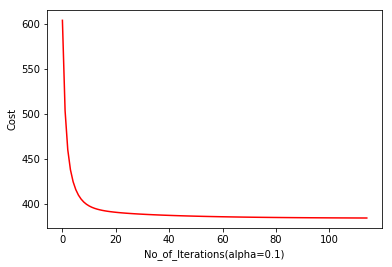

In [231]:
plt.plot(train_cost,'r')
plt.xlabel('No_of_Iterations(alpha=0.1)')
plt.ylabel('Cost')

Text(0, 0.5, 'Cost')

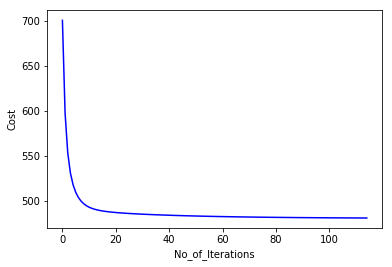

In [202]:
plt.plot(test_cost,'b')
plt.xlabel('No_of_Iterations')
plt.ylabel('Cost')

In [135]:
#### Alpha value = 0.01
## Initializing beta
beta=np.zeros([1,len(x_train[0])])
## Running the algorithm for the first experiment for the training dataset
threshold = 0.01
train_cost1=[]
train_cos1=[]
test_cost1=[]
train_cos1.append(10000)
for i in range(1,10000):
    train_cos1.append(costfunction(x_train,y_train,beta))
    train_cost1.append(costfunction(x_train,y_train,beta))
    test_cost1.append(costfunction(x_test,y_test,beta))
    if (train_cos1[i-1]-train_cos1[i])<= threshold:
        print("Achieved Convergence")
        break 
    beta= gradientdescentFunction (x_train,y_train,beta,0.01)
    print("Train Cost:{} || Test Cost:{}".format(train_cost1[i-1],test_cost1[i-1]))

Train Cost:603.5170551512282 || Test Cost:700.287513988809
Train Cost:591.4536376520635 || Test Cost:687.8998173656719
Train Cost:580.2615551184116 || Test Cost:676.4054958566392
Train Cost:569.8698198387597 || Test Cost:665.732342442176
Train Cost:560.2135350111131 || Test Cost:655.814301846032
Train Cost:551.2333609505556 || Test Cost:646.5909341269848
Train Cost:542.8750284759727 || Test Cost:638.0069255209347
Train Cost:535.08889529181 || Test Cost:630.0116423522611
Train Cost:527.8295415523095 || Test Cost:622.5587242041076
Train Cost:521.0554011342413 || Test Cost:615.6057128751182
Train Cost:514.7284254526211 || Test Cost:609.113713958003
Train Cost:508.81377693498547 || Test Cost:603.0470881558543
Train Cost:503.27954952588607 || Test Cost:597.3731697077635
Train Cost:498.0965138266173 || Test Cost:592.0620095282441
Train Cost:493.23788468780117 || Test Cost:587.0861408772432
Train Cost:488.679109266177 || Test Cost:582.4203655709616
Train Cost:484.39767373345893 || Test Cost:5

Train Cost:394.10960961095793 || Test Cost:489.52207645007303
Train Cost:394.030616125203 || Test Cost:489.45602485736094
Train Cost:393.95307863692716 || Test Cost:489.3912410431519
Train Cost:393.8769588313687 || Test Cost:489.3276895531284
Train Cost:393.8022195428919 || Test Cost:489.2653360516773
Train Cost:393.7288247175138 || Test Cost:489.2041472837899
Train Cost:393.65673937675075 || Test Cost:489.14409103835743
Train Cost:393.58592958273806 || Test Cost:489.0851361128103
Train Cost:393.5163624045706 || Test Cost:489.027252279043
Train Cost:393.448005885818 || Test Cost:488.97041025057626
Train Cost:393.38082901316824 || Test Cost:488.91458165090523
Train Cost:393.31480168615946 || Test Cost:488.85973898298926
Train Cost:393.24989468795616 || Test Cost:488.80585559983615
Train Cost:393.18607965713056 || Test Cost:488.7529056761398
Train Cost:393.1233290604143 || Test Cost:488.70086418092905
Train Cost:393.06161616638 || Test Cost:488.6497068511915
Train Cost:393.000915020022 |

Train Cost:389.23636611260554 || Test Cost:485.45026725913135
Train Cost:389.2179135548361 || Test Cost:485.43418810642044
Train Cost:389.1995669999842 || Test Cost:485.41819012351004
Train Cost:389.18132513622 || Test Cost:485.4022723100504
Train Cost:389.1631866776156 || Test Cost:485.38643368645
Train Cost:389.14515036353896 || Test Cost:485.3706732933627
Train Cost:389.12721495806204 || Test Cost:485.35499019119027
Train Cost:389.1093792493849 || Test Cost:485.3393834595964
Train Cost:389.09164204927515 || Test Cost:485.3238521970355
Train Cost:389.07400219252037 || Test Cost:485.30839552029386
Train Cost:389.05645853639624 || Test Cost:485.29301256404256
Train Cost:389.03900996014704 || Test Cost:485.2777024804033
Train Cost:389.02165536448 || Test Cost:485.26246443852534
Train Cost:389.00439367107253 || Test Cost:485.24729762417365
Train Cost:388.98722382209195 || Test Cost:485.23220123932896
Train Cost:388.9701447797269 || Test Cost:485.21717450179716
Train Cost:388.953155525731

Train Cost:387.3874068961396 || Test Cost:483.7769018777477
Train Cost:387.37709070669194 || Test Cost:483.76718097755725
Train Cost:387.3668111573848 || Test Cost:483.7574899176393
Train Cost:387.3565680696437 || Test Cost:483.74782856857996
Train Cost:387.3463612666081 || Test Cost:483.73819680217906
Train Cost:387.33619057310307 || Test Cost:483.72859449142993
Train Cost:387.32605581561154 || Test Cost:483.719021510499
Train Cost:387.31595682224815 || Test Cost:483.70947773470596
Train Cost:387.3058934227318 || Test Cost:483.6999630405047
Train Cost:387.29586544836 || Test Cost:483.69047730546396
Achieved Convergence


Text(0, 0.5, 'Cost')

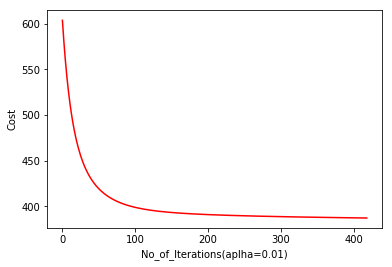

In [232]:
plt.plot(train_cost1,'r')
plt.xlabel('No_of_Iterations(aplha=0.01)')
plt.ylabel('Cost')

Text(0, 0.5, 'Cost')

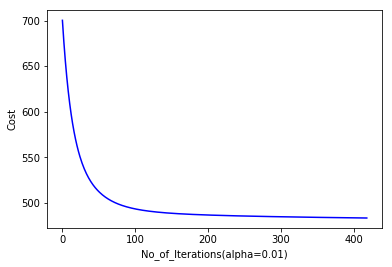

In [234]:
plt.plot(test_cost1,'b')
plt.xlabel('No_of_Iterations(alpha=0.01)')
plt.ylabel('Cost')

In [270]:
#### Alpha value = 0.001
## Initializing beta
beta=np.zeros([1,len(x_train[0])])
## Running the algorithm for the first experiment for the training dataset
threshold = 0.01
train_cos2=[]
train_cost2=[]
test_cost2=[]
train_cos2.append(10000)
for i in range(1,10000):
    train_cos2.append(costfunction(x_train,y_train,beta))
    train_cost2.append(costfunction(x_train,y_train,beta))
    test_cost2.append(costfunction(x_test,y_test,beta))
    if (train_cos2[i-1]-train_cos2[i])<= threshold:
        print("Achieved Convergence")
        break 
    beta= gradientdescentFunction (x_train,y_train,beta,0.001)
    print("Train Cost:{} || Test Cost:{}".format(train_cost2[i-1],test_cost2[i-1]))

Train Cost:603.5170551512282 || Test Cost:700.287513988809
Train Cost:602.2902641116272 || Test Cost:699.0280913472673
Train Cost:601.0725237477127 || Test Cost:697.7779420668489
Train Cost:599.8637586801871 || Test Cost:696.5369895333932
Train Cost:598.6638941907256 || Test Cost:695.3051577998466
Train Cost:597.4728562160609 || Test Cost:694.0823715803209
Train Cost:596.2905713421172 || Test Cost:692.8685562442037
Train Cost:595.1169667982008 || Test Cost:691.6636378103215
Train Cost:593.9519704512403 || Test Cost:690.4675429411558
Train Cost:592.7955108000812 || Test Cost:689.2801989371112
Train Cost:591.6475169698299 || Test Cost:688.1015337308351
Train Cost:590.5079187062502 || Test Cost:686.9314758815877
Train Cost:589.3766463702095 || Test Cost:685.7699545696648
Train Cost:588.2536309321762 || Test Cost:684.6168995908673
Train Cost:587.1388039667647 || Test Cost:683.4722413510242
Train Cost:586.0320976473325 || Test Cost:682.335910860562
Train Cost:584.9334447406228 || Test Cost:

Train Cost:493.2457799993613 || Test Cost:587.1237087356827
Train Cost:492.78202960528665 || Test Cost:586.6490645901885
Train Cost:492.32116698919066 || Test Cost:586.1774060613412
Train Cost:491.86317011231324 || Test Cost:585.70871052128
Train Cost:491.4080171218476 || Test Cost:585.2429555312763
Train Cost:490.9556863493016 || Test Cost:584.7801188400794
Train Cost:490.50615630887347 || Test Cost:584.3201783822764
Train Cost:490.05940569584334 || Test Cost:583.8631122766675
Train Cost:489.61541338497665 || Test Cost:583.4088988246556
Train Cost:489.17415842894513 || Test Cost:582.9575165086496
Train Cost:488.7356200567594 || Test Cost:582.5089439904835
Train Cost:488.29977767221663 || Test Cost:582.0631601098474
Train Cost:487.86661085236256 || Test Cost:581.6201438827347
Train Cost:487.436099345966 || Test Cost:581.1798744999016
Train Cost:487.00822307200855 || Test Cost:580.7423313253413
Train Cost:486.58296211818663 || Test Cost:580.3074938947706
Train Cost:486.1602967394274 || 

Train Cost:449.69283467803797 || Test Cost:542.7839854849872
Train Cost:449.4778131221295 || Test Cost:542.5670795793561
Train Cost:449.26387787599873 || Test Cost:542.3513012717515
Train Cost:449.051021724003 || Test Cost:542.1366430700278
Train Cost:448.83923750721726 || Test Cost:541.92309754033
Train Cost:448.6285181229486 || Test Cost:541.7106573066028
Train Cost:448.418856524258 || Test Cost:541.4993150501001
Train Cost:448.2102457194821 || Test Cost:541.2890635089017
Train Cost:448.00267877176356 || Test Cost:541.0798954774333
Train Cost:447.79614879858156 || Test Cost:540.8718038059908
Train Cost:447.59064897128997 || Test Cost:540.664781400268
Train Cost:447.38617251465695 || Test Cost:540.4588212208897
Train Cost:447.1827127064101 || Test Cost:540.2539162829486
Train Cost:446.9802628767852 || Test Cost:540.0500596555454
Train Cost:446.77881640807925 || Test Cost:539.8472444613336
Train Cost:446.57836673420627 || Test Cost:539.6454638760687
Train Cost:446.37890734025865 || Tes

Train Cost:428.09122557393874 || Test Cost:521.2105000355245
Train Cost:427.97563885062135 || Test Cost:521.0966506923052
Train Cost:427.86052606379843 || Test Cost:520.9832904901589
Train Cost:427.7458846014856 || Test Cost:520.8704166925469
Train Cost:427.63171186990695 || Test Cost:520.7580265818881
Train Cost:427.51800529334935 || Test Cost:520.6461174594094
Train Cost:427.40476231401556 || Test Cost:520.5346866449964
Train Cost:427.2919803918817 || Test Cost:520.4237314770444
Train Cost:427.17965700455426 || Test Cost:520.3132493123121
Train Cost:427.0677896471276 || Test Cost:520.2032375257766
Train Cost:426.9563758320446 || Test Cost:520.0936935104875
Train Cost:426.8454130889572 || Test Cost:519.9846146774254
Train Cost:426.7348989645885 || Test Cost:519.8759984553589
Train Cost:426.6248310225962 || Test Cost:519.7678422907042
Train Cost:426.5152068434369 || Test Cost:519.6601436473856
Train Cost:426.4060240242315 || Test Cost:519.5529000066975
Train Cost:426.2972801786326 || T

Train Cost:415.9246713481678 || Test Cost:509.37470352331195
Train Cost:415.855169361276 || Test Cost:509.3081174609277
Train Cost:415.7859081160535 || Test Cost:509.24177590144376
Train Cost:415.71688652077296 || Test Cost:509.17567769972896
Train Cost:415.64810349013715 || Test Cost:509.10982171743206
Train Cost:415.5795579452323 || Test Cost:509.04420682293244
Train Cost:415.511248813482 || Test Cost:508.97883189129266
Train Cost:415.4431750286011 || Test Cost:508.91369580421
Train Cost:415.3753355305501 || Test Cost:508.8487974499691
Train Cost:415.3077292654905 || Test Cost:508.7841357233945
Train Cost:415.240355185739 || Test Cost:508.71970952580483
Train Cost:415.17321224972426 || Test Cost:508.65551776496545
Train Cost:415.10629942194214 || Test Cost:508.5915593550431
Train Cost:415.039615672912 || Test Cost:508.52783321656017
Train Cost:414.97315997913375 || Test Cost:508.4643382763489
Train Cost:414.90693132304455 || Test Cost:508.4010734675071
Train Cost:414.8409286929761 ||

Train Cost:408.2190147363085 || Test Cost:502.088478098116
Train Cost:408.17461958681616 || Test Cost:502.04713769773366
Train Cost:408.1303597708158 || Test Cost:502.0059316061699
Train Cost:408.0862347682707 || Test Cost:501.96485928323983
Train Cost:408.04224406166935 || Test Cost:501.92392019144006
Train Cost:407.99838713601156 || Test Cost:501.8831137959328
Train Cost:407.9546634787914 || Test Cost:501.8424395645284
Train Cost:407.9110725799826 || Test Cost:501.80189696766945
Train Cost:407.8676139320224 || Test Cost:501.7614854784144
Train Cost:407.82428702979786 || Test Cost:501.7212045724215
Train Cost:407.78109137062864 || Test Cost:501.68105372793303
Train Cost:407.73802645425394 || Test Cost:501.6410324257589
Train Cost:407.69509178281675 || Test Cost:501.6011401492615
Train Cost:407.652286860849 || Test Cost:501.5613763843392
Train Cost:407.6096111952569 || Test Cost:501.5217406194119
Train Cost:407.56706429530715 || Test Cost:501.4822323454045
Train Cost:407.5246456726116 

Train Cost:403.21008948072324 || Test Cost:497.48193714453106
Train Cost:403.1802661566336 || Test Cost:497.45489437286136
Train Cost:403.15052522587087 || Test Cost:497.4279313323818
Train Cost:403.1208664065785 || Test Cost:497.40104773556646
Train Cost:403.0912894180583 || Test Cost:497.37424329611446
Train Cost:403.061793980765 || Test Cost:497.3475177289439
Train Cost:403.0323798162999 || Test Cost:497.32087075018495
Train Cost:403.0030466474052 || Test Cost:497.2943020771744
Train Cost:402.9737941979577 || Test Cost:497.26781142844834
Train Cost:402.944622192964 || Test Cost:497.24139852373685
Train Cost:402.91553035855355 || Test Cost:497.21506308395726
Train Cost:402.8865184219736 || Test Cost:497.18880483120813
Train Cost:402.85758611158326 || Test Cost:497.162623488763
Train Cost:402.8287331568477 || Test Cost:497.13651878106475
Train Cost:402.79995928833296 || Test Cost:497.11049043371895
Train Cost:402.7712642377 || Test Cost:497.0845381734882
Train Cost:402.74264773769903 

Train Cost:399.7672813847347 || Test Cost:494.3960666860509
Train Cost:399.74658687560196 || Test Cost:494.3777549498317
Train Cost:399.7259447196196 || Test Cost:494.3594925990734
Train Cost:399.7053547514675 || Test Cost:494.34127946881136
Train Cost:399.684816806428 || Test Cost:494.3231153947086
Train Cost:399.6643307203832 || Test Cost:494.30500021305403
Train Cost:399.64389632981204 || Test Cost:494.2869337607586
Train Cost:399.62351347178856 || Test Cost:494.26891587535357
Train Cost:399.603181983978 || Test Cost:494.25094639498707
Train Cost:399.5829017046361 || Test Cost:494.2330251584216
Train Cost:399.56267247260405 || Test Cost:494.21515200503103
Train Cost:399.5424941273087 || Test Cost:494.19732677479846
Train Cost:399.522366508758 || Test Cost:494.17954930831297
Train Cost:399.50228945753923 || Test Cost:494.161819446767
Train Cost:399.48226281481686 || Test Cost:494.144137031954
Train Cost:399.46228642232916 || Test Cost:494.1265019062654
Train Cost:399.4423601223868 ||

Train Cost:397.3284862400693 || Test Cost:492.26048672296054
Train Cost:397.3137130524446 || Test Cost:492.2476960864293
Train Cost:397.29897404833235 || Test Cost:492.2349368939365
Train Cost:397.2842691260912 || Test Cost:492.22220904637027
Train Cost:397.2695981844208 || Test Cost:492.20951244496837
Train Cost:397.25496112236203 || Test Cost:492.19684699131756
Train Cost:397.2403578392949 || Test Cost:492.18421258735094
Train Cost:397.22578823493774 || Test Cost:492.1716091353475
Train Cost:397.21125220934545 || Test Cost:492.1590365379308
Train Cost:397.1967496629085 || Test Cost:492.14649469806693
Train Cost:397.18228049635144 || Test Cost:492.13398351906375
Train Cost:397.1678446107319 || Test Cost:492.1215029045692
Train Cost:397.15344190743946 || Test Cost:492.1090527585703
Train Cost:397.13907228819363 || Test Cost:492.09663298539147
Train Cost:397.1247356550433 || Test Cost:492.0842434896933
Train Cost:397.1104319103653 || Test Cost:492.07188417647114
Train Cost:397.096160956

Train Cost:395.5847612598291 || Test Cost:490.763994181711
Train Cost:395.5738512952243 || Test Cost:490.75471733504327
Train Cost:395.5629642995539 || Test Cost:490.74546110938684
Train Cost:395.5521002079422 || Test Cost:490.7362254428873
Train Cost:395.54125895572014 || Test Cost:490.7270102738976
Train Cost:395.5304404784248 || Test Cost:490.71781554097714
Train Cost:395.519644711799 || Test Cost:490.70864118289126
Train Cost:395.50887159178995 || Test Cost:490.69948713861015
Train Cost:395.49812105454924 || Test Cost:490.6903533473082
Train Cost:395.4873930364312 || Test Cost:490.68123974836345
Train Cost:395.476687473993 || Test Cost:490.6721462813568
Train Cost:395.4660043039935 || Test Cost:490.6630728860708
Train Cost:395.4553434633931 || Test Cost:490.65401950248975
Train Cost:395.44470488935224 || Test Cost:490.6449860707979
Train Cost:395.43408851923095 || Test Cost:490.6359725313799
Train Cost:395.42349429058885 || Test Cost:490.62697882481916
Train Cost:395.41292214118323

Text(0, 0.5, 'Cost')

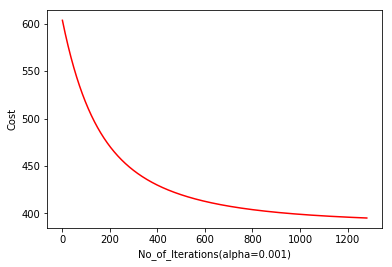

In [235]:
plt.plot(train_cost2,'r')
plt.xlabel('No_of_Iterations(alpha=0.001)')
plt.ylabel('Cost')

Text(0, 0.5, 'Cost')

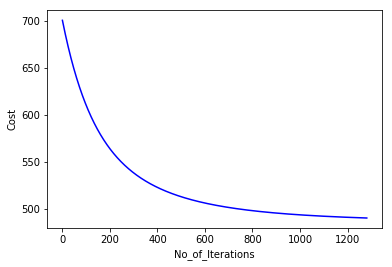

In [206]:
plt.plot(test_cost2,'b')
plt.xlabel('No_of_Iterations')
plt.ylabel('Cost')

In [128]:
#### Alpha value = 0.0001
## Initializing beta
beta=np.zeros([1,len(x_train[0])])
## Running the algorithm for the first experiment for the training dataset
threshold = 0.01
train_cost3=[]
train_cos3=[]
test_cost3=[]
train_cos3.append(10000)
for i in range(1,100000):
    train_cost3.append(costfunction(x_train,y_train,beta))
    train_cos3.append(costfunction(x_train,y_train,beta))
    test_cost3.append(costfunction(x_test,y_test,beta))
    if (train_cos3[i-1]-train_cos3[i])<= threshold:
        print("Achieved Convergence")
        break 
    beta= gradientdescentFunction (x_train,y_train,beta,0.0001)
    print("Train Cost:{} || Test Cost:{}".format(train_cost3[i-1],test_cost3[i-1]))

Train Cost:603.5170551512282 || Test Cost:700.287513988809
Train Cost:603.3941715543713 || Test Cost:700.1613651948626
Train Cost:603.2713788053112 || Test Cost:700.0353094778574
Train Cost:603.1486768282198 || Test Cost:699.9093467607287
Train Cost:603.026065547335 || Test Cost:699.7834769664789
Train Cost:602.9035448869619 || Test Cost:699.6577000181778
Train Cost:602.7811147714718 || Test Cost:699.5320158389621
Train Cost:602.6587751253026 || Test Cost:699.4064243520356
Train Cost:602.5365258729582 || Test Cost:699.2809254806693
Train Cost:602.4143669390095 || Test Cost:699.1555191482009
Train Cost:602.2922982480931 || Test Cost:699.0302052780349
Train Cost:602.170319724912 || Test Cost:698.9049837936433
Train Cost:602.0484312942357 || Test Cost:698.7798546185638
Train Cost:601.9266328808992 || Test Cost:698.6548176764018
Train Cost:601.8049244098036 || Test Cost:698.5298728908288
Train Cost:601.6833058059168 || Test Cost:698.4050201855831
Train Cost:601.5617769942716 || Test Cost:6

Train Cost:586.83197957765 || Test Cost:683.1575678633601
Train Cost:586.7213481536113 || Test Cost:683.0439777452633
Train Cost:586.6107973828022 || Test Cost:682.9304703388444
Train Cost:586.5003271983405 || Test Cost:682.8170455760712
Train Cost:586.3899375334034 || Test Cost:682.7037033889695
Train Cost:586.2796283212265 || Test Cost:682.5904437096251
Train Cost:586.1693994951037 || Test Cost:682.4772664701826
Train Cost:586.0592509883875 || Test Cost:682.3641716028453
Train Cost:585.9491827344888 || Test Cost:682.251159039876
Train Cost:585.8391946668768 || Test Cost:682.138228713596
Train Cost:585.7292867190789 || Test Cost:682.0253805563859
Train Cost:585.6194588246814 || Test Cost:681.912614500685
Train Cost:585.5097109173277 || Test Cost:681.799930478991
Train Cost:585.4000429307201 || Test Cost:681.6873284238607
Train Cost:585.2904547986192 || Test Cost:681.5748082679094
Train Cost:585.1809464548425 || Test Cost:681.462369943811
Train Cost:585.0715178332666 || Test Cost:681.3

Train Cost:572.0992782783402 || Test Cost:668.0301716088991
Train Cost:571.9993129956579 || Test Cost:667.9275248687807
Train Cost:571.8994195502682 || Test Cost:667.82495186875
Train Cost:571.799597883005 || Test Cost:667.722452548568
Train Cost:571.6998479347533 || Test Cost:667.6200268480479
Train Cost:571.6001696464505 || Test Cost:667.5176747070552
Train Cost:571.5005629590844 || Test Cost:667.415396065507
Train Cost:571.4010278136956 || Test Cost:667.3131908633733
Train Cost:571.3015641513756 || Test Cost:667.2110590406753
Train Cost:571.2021719132674 || Test Cost:667.109000537487
Train Cost:571.1028510405653 || Test Cost:667.0070152939339
Train Cost:571.0036014745156 || Test Cost:666.9051032501935
Train Cost:570.9044231564152 || Test Cost:666.8032643464956
Train Cost:570.8053160276127 || Test Cost:666.7014985231209
Train Cost:570.7062800295078 || Test Cost:666.5998057204029
Train Cost:570.6073151035513 || Test Cost:666.498185878726
Train Cost:570.5084211912456 || Test Cost:666.3

Train Cost:558.596548930202 || Test Cost:654.1652317824957
Train Cost:558.5062156488303 || Test Cost:654.0724767524043
Train Cost:558.4159462997434 || Test Cost:653.979787410409
Train Cost:558.3257408306719 || Test Cost:653.8871637032435
Train Cost:558.2355991893926 || Test Cost:653.7946055776858
Train Cost:558.1455213237267 || Test Cost:653.702112980562
Train Cost:558.055507181542 || Test Cost:653.6096858587426
Train Cost:557.9655567107511 || Test Cost:653.5173241591449
Train Cost:557.875669859312 || Test Cost:653.4250278287315
Train Cost:557.7858465752282 || Test Cost:653.3327968145112
Train Cost:557.6960868065484 || Test Cost:653.2406310635384
Train Cost:557.6063905013666 || Test Cost:653.1485305229136
Train Cost:557.5167576078219 || Test Cost:653.0564951397824
Train Cost:557.4271880740985 || Test Cost:652.9645248613367
Train Cost:557.337681848426 || Test Cost:652.8726196348139
Train Cost:557.2482388790789 || Test Cost:652.7807794074963
Train Cost:557.1588591143768 || Test Cost:652.

Train Cost:546.4673658143464 || Test Cost:641.7114636217973
Train Cost:546.3855512839085 || Test Cost:641.6274652939609
Train Cost:546.3037937471516 || Test Cost:641.5435255798678
Train Cost:546.2220931578413 || Test Cost:641.4596444323556
Train Cost:546.1404494697831 || Test Cost:641.3758218043018
Train Cost:546.0588626368226 || Test Cost:641.2920576486252
Train Cost:545.9773326128454 || Test Cost:641.2083519182853
Train Cost:545.8958593517772 || Test Cost:641.124704566281
Train Cost:545.8144428075835 || Test Cost:641.0411155456528
Train Cost:545.7330829342704 || Test Cost:640.9575848094813
Train Cost:545.6517796858831 || Test Cost:640.8741123108872
Train Cost:545.570533016507 || Test Cost:640.790698003032
Train Cost:545.489342880268 || Test Cost:640.7073418391172
Train Cost:545.4082092313308 || Test Cost:640.6240437723849
Train Cost:545.3271320239003 || Test Cost:640.5408037561173
Train Cost:545.2461112122212 || Test Cost:640.4576217436367
Train Cost:545.1651467505778 || Test Cost:64

Train Cost:535.4735192101135 || Test Cost:630.4252746863515
Train Cost:535.3993022576317 || Test Cost:630.3490934217288
Train Cost:535.3251361600409 || Test Cost:630.2729645058442
Train Cost:535.251020876427 || Test Cost:630.1968878969212
Train Cost:535.176956365911 || Test Cost:630.1208635532184
Train Cost:535.1029425876496 || Test Cost:630.0448914330311
Train Cost:535.0289795008347 || Test Cost:629.96897149469
Train Cost:534.9550670646933 || Test Cost:629.8931036965611
Train Cost:534.8812052384881 || Test Cost:629.817287997047
Train Cost:534.8073939815164 || Test Cost:629.7415243545852
Train Cost:534.7336332531114 || Test Cost:629.6658127276495
Train Cost:534.6599230126413 || Test Cost:629.5901530747489
Train Cost:534.586263219509 || Test Cost:629.5145453544279
Train Cost:534.5126538331527 || Test Cost:629.4389895252671
Train Cost:534.4390948130462 || Test Cost:629.363485545882
Train Cost:534.3655861186978 || Test Cost:629.2880333749239
Train Cost:534.2921277096507 || Test Cost:629.2

Train Cost:525.7628943404592 || Test Cost:620.4591003695407
Train Cost:525.69527775641 || Test Cost:620.3897162803755
Train Cost:525.6277067388975 || Test Cost:620.3203791375242
Train Cost:525.5601812515742 || Test Cost:620.2510889038364
Train Cost:525.4927012581238 || Test Cost:620.1818455421932
Train Cost:525.4252667222613 || Test Cost:620.1126490155074
Train Cost:525.357877607733 || Test Cost:620.0434992867239
Train Cost:525.2905338783165 || Test Cost:619.9743963188187
Train Cost:525.2232354978203 || Test Cost:619.9053400748
Train Cost:525.1559824300848 || Test Cost:619.8363305177072
Train Cost:525.0887746389806 || Test Cost:619.7673676106116
Train Cost:525.0216120884103 || Test Cost:619.6984513166157
Train Cost:524.9544947423068 || Test Cost:619.6295815988535
Train Cost:524.8874225646349 || Test Cost:619.560758420491
Train Cost:524.8203955193899 || Test Cost:619.4919817447255
Train Cost:524.7534135705982 || Test Cost:619.423251534785
Train Cost:524.6864766823176 || Test Cost:619.35

Train Cost:516.8474124301226 || Test Cost:611.312407724115
Train Cost:516.785753464787 || Test Cost:611.2491642506234
Train Cost:516.7241353345487 || Test Cost:611.1859628851015
Train Cost:516.6625580071296 || Test Cost:611.1228035945255
Train Cost:516.6010214502797 || Test Cost:611.0596863458989
Train Cost:516.5395256317771 || Test Cost:610.9966111062536
Train Cost:516.4780705194264 || Test Cost:610.9335778426494
Train Cost:516.416656081061 || Test Cost:610.8705865221741
Train Cost:516.3552822845413 || Test Cost:610.8076371119437
Train Cost:516.2939490977556 || Test Cost:610.744729579102
Train Cost:516.2326564886191 || Test Cost:610.6818638908209
Train Cost:516.1714044250755 || Test Cost:610.6190400143
Train Cost:516.1101928750952 || Test Cost:610.556257916767
Train Cost:516.0490218066766 || Test Cost:610.4935175654773
Train Cost:515.9878911878452 || Test Cost:610.4308189277143
Train Cost:515.9268009866543 || Test Cost:610.3681619707896
Train Cost:515.8657511711842 || Test Cost:610.30

Train Cost:508.5422064842181 || Test Cost:602.796014090613
Train Cost:508.48599897745305 || Test Cost:602.7383943591113
Train Cost:508.42982801716494 || Test Cost:602.6808123454954
Train Cost:508.3736935747496 || Test Cost:602.6232680204678
Train Cost:508.31759562162705 || Test Cost:602.5657613547563
Train Cost:508.2615341292419 || Test Cost:602.5082923191136
Train Cost:508.20550906906277 || Test Cost:602.4508608843164
Train Cost:508.14952041258323 || Test Cost:602.393467021167
Train Cost:508.0935681313211 || Test Cost:602.3361107004922
Train Cost:508.03765219681816 || Test Cost:602.2787918931432
Train Cost:507.98177258064067 || Test Cost:602.2215105699962
Train Cost:507.92592925437947 || Test Cost:602.1642667019518
Train Cost:507.87012218964924 || Test Cost:602.1070602599356
Train Cost:507.8143513580892 || Test Cost:602.0498912148973
Train Cost:507.75861673136285 || Test Cost:601.9927595378119
Train Cost:507.70291828115745 || Test Cost:601.9356651996783
Train Cost:507.647255979185 || 

Train Cost:501.2736018608659 || Test Cost:595.3470815221148
Train Cost:501.22207892424643 || Test Cost:595.2942983799516
Train Cost:501.1705888851799 || Test Cost:595.2415492164846
Train Cost:501.1191317181732 || Test Cost:595.1888340055767
Train Cost:501.06770739775567 || Test Cost:595.1361527211124
Train Cost:501.0163158984778 || Test Cost:595.0835053369982
Train Cost:500.9649571949114 || Test Cost:595.0308918271629
Train Cost:500.91363126165083 || Test Cost:594.9783121655571
Train Cost:500.86233807331104 || Test Cost:594.9257663261532
Train Cost:500.8110776045295 || Test Cost:594.8732542829457
Train Cost:500.75984982996454 || Test Cost:594.8207760099513
Train Cost:500.7086547242964 || Test Cost:594.7683314812078
Train Cost:500.6574922622267 || Test Cost:594.7159206707759
Train Cost:500.60636241847874 || Test Cost:594.6635435527372
Train Cost:500.5552651677974 || Test Cost:594.611200101196
Train Cost:500.50420048494857 || Test Cost:594.5588902902775
Train Cost:500.4531683447199 || Te

Train Cost:494.5583178530841 || Test Cost:588.4700747860309
Train Cost:494.511043596769 || Test Cost:588.4216815814033
Train Cost:494.4637989624332 || Test Cost:588.373318995332
Train Cost:494.4165839273641 || Test Cost:588.3249870045053
Train Cost:494.36939846886816 || Test Cost:588.2766855856307
Train Cost:494.3222425642713 || Test Cost:588.2284147154353
Train Cost:494.27511619091797 || Test Cost:588.180174370666
Train Cost:494.2280193261728 || Test Cost:588.1319645280889
Train Cost:494.18095194741886 || Test Cost:588.08378516449
Train Cost:494.1339140320584 || Test Cost:588.0356362566743
Train Cost:494.0869055575133 || Test Cost:587.9875177814661
Train Cost:494.039926501224 || Test Cost:587.9394297157098
Train Cost:493.9929768406504 || Test Cost:587.8913720362689
Train Cost:493.94605655327103 || Test Cost:587.843344720026
Train Cost:493.8991656165841 || Test Cost:587.7953477438836
Train Cost:493.85230400810616 || Test Cost:587.7473810847632
Train Cost:493.8054717053736 || Test Cost:

Train Cost:488.17492607817496 || Test Cost:581.93847853019
Train Cost:488.1316128784034 || Test Cost:581.894181130762
Train Cost:488.08832628037106 || Test Cost:581.849911248282
Train Cost:488.0450662639159 || Test Cost:581.8056688620322
Train Cost:488.00183280889263 || Test Cost:581.7614539513125
Train Cost:487.95862589517264 || Test Cost:581.7172664954397
Train Cost:487.91544550264433 || Test Cost:581.6731064737481
Train Cost:487.8722916112135 || Test Cost:581.6289738655892
Train Cost:487.82916420080187 || Test Cost:581.5848686503315
Train Cost:487.7860632513492 || Test Cost:581.5407908073608
Train Cost:487.7429887428115 || Test Cost:581.4967403160805
Train Cost:487.6999406551618 || Test Cost:581.4527171559105
Train Cost:487.6569189683898 || Test Cost:581.4087213062885
Train Cost:487.6139236625024 || Test Cost:581.3647527466687
Train Cost:487.570954717523 || Test Cost:581.3208114565228
Train Cost:487.528012113492 || Test Cost:581.2768974153397
Train Cost:487.4850958304666 || Test Cos

Train Cost:482.44077030299957 || Test Cost:576.076921046207
Train Cost:482.40094461233883 || Test Cost:576.0362323333375
Train Cost:482.3611428952724 || Test Cost:575.9955684354379
Train Cost:482.3213651338453 || Test Cost:575.9549293340381
Train Cost:482.28161131011734 || Test Cost:575.9143150106827
Train Cost:482.24188140616303 || Test Cost:575.873725446932
Train Cost:482.2021754040721 || Test Cost:575.8331606243617
Train Cost:482.16249328594915 || Test Cost:575.7926205245622
Train Cost:482.12283503391393 || Test Cost:575.7521051291399
Train Cost:482.0832006301011 || Test Cost:575.7116144197158
Train Cost:482.0435900566602 || Test Cost:575.6711483779269
Train Cost:482.00400329575575 || Test Cost:575.6307069854242
Train Cost:481.96444032956725 || Test Cost:575.5902902238754
Train Cost:481.924901140289 || Test Cost:575.5498980749625
Train Cost:481.8853857101305 || Test Cost:575.5095305203822
Train Cost:481.8458940213156 || Test Cost:575.4691875418479
Train Cost:481.8064260560837 || Tes

Train Cost:477.0906252875031 || Test Cost:570.6139132353297
Train Cost:477.05398772553315 || Test Cost:570.5765255560742
Train Cost:477.017371763949 || Test Cost:570.5391602491469
Train Cost:476.9807773867765 || Test Cost:570.5018172980967
Train Cost:476.9442045780547 || Test Cost:570.4644966864864
Train Cost:476.90765332183645 || Test Cost:570.4271983978919
Train Cost:476.8711236021873 || Test Cost:570.3899224159023
Train Cost:476.8346154031865 || Test Cost:570.3526687241213
Train Cost:476.7981287089262 || Test Cost:570.3154373061648
Train Cost:476.76166350351167 || Test Cost:570.2782281456632
Train Cost:476.72521977106203 || Test Cost:570.2410412262598
Train Cost:476.688797495709 || Test Cost:570.2038765316119
Train Cost:476.6523966615979 || Test Cost:570.1667340453898
Train Cost:476.61601725288693 || Test Cost:570.1296137512775
Train Cost:476.5796592537477 || Test Cost:570.0925156329721
Train Cost:476.5433226483648 || Test Cost:570.0554396741846
Train Cost:476.5070074209362 || Test 

Train Cost:472.16458771517586 || Test Cost:565.5901606870578
Train Cost:472.1308245551132 || Test Cost:565.5557509551776
Train Cost:472.09708088335356 || Test Cost:565.5213614192447
Train Cost:472.06335668567516 || Test Cost:565.4869920645963
Train Cost:472.029651947868 || Test Cost:565.4526428765805
Train Cost:471.9959666557337 || Test Cost:565.418313840558
Train Cost:471.96230079508575 || Test Cost:565.3840049419011
Train Cost:471.9286543517493 || Test Cost:565.3497161659943
Train Cost:471.8950273115609 || Test Cost:565.3154474982341
Train Cost:471.86141966036934 || Test Cost:565.2811989240288
Train Cost:471.82783138403494 || Test Cost:565.2469704287985
Train Cost:471.7942624684296 || Test Cost:565.2127619979756
Train Cost:471.76071289943684 || Test Cost:565.1785736170043
Train Cost:471.72718266295203 || Test Cost:565.1444052713406
Train Cost:471.69367174488224 || Test Cost:565.1102569464523
Train Cost:471.6601801311458 || Test Cost:565.0761286278196
Train Cost:471.6267078076731 || T

Train Cost:467.65236282915873 || Test Cost:560.9946594712947
Train Cost:467.6211771423505 || Test Cost:560.9629214441278
Train Cost:467.5900090754193 || Test Cost:560.9312016853743
Train Cost:467.5588586156832 || Test Cost:560.8995001819428
Train Cost:467.52772575047055 || Test Cost:560.8678169207531
Train Cost:467.49661046711987 || Test Cost:560.8361518887355
Train Cost:467.46551275298043 || Test Cost:560.8045050728309
Train Cost:467.4344325954118 || Test Cost:560.7728764599905
Train Cost:467.40336998178395 || Test Cost:560.7412660371766
Train Cost:467.37232489947695 || Test Cost:560.7096737913618
Train Cost:467.3412973358816 || Test Cost:560.6780997095293
Train Cost:467.31028727839885 || Test Cost:560.6465437786729
Train Cost:467.2792947144399 || Test Cost:560.6150059857972
Train Cost:467.2483196314267 || Test Cost:560.5834863179169
Train Cost:467.2173620167908 || Test Cost:560.5519847620578
Train Cost:467.186421857975 || Test Cost:560.5205013052557
Train Cost:467.15549914243144 || T

Train Cost:463.452287769832 || Test Cost:556.7233874022471
Train Cost:463.423449994476 || Test Cost:556.6940842021089
Train Cost:463.3946281608923 || Test Cost:556.6647975371797
Train Cost:463.3658222577721 || Test Cost:556.6355273957722
Train Cost:463.3370322738156 || Test Cost:556.6062737662086
Train Cost:463.30825819773224 || Test Cost:556.5770366368204
Train Cost:463.2795000182409 || Test Cost:556.5478159959488
Train Cost:463.25075772406916 || Test Cost:556.518611831944
Train Cost:463.2220313039543 || Test Cost:556.4894241331657
Train Cost:463.19332074664254 || Test Cost:556.4602528879834
Train Cost:463.1646260408894 || Test Cost:556.4310980847754
Train Cost:463.13594717545914 || Test Cost:556.4019597119296
Train Cost:463.1072841391256 || Test Cost:556.3728377578437
Train Cost:463.078636920672 || Test Cost:556.3437322109243
Train Cost:463.05000550888985 || Test Cost:556.314643059587
Train Cost:463.02138989258054 || Test Cost:556.2855702922573
Train Cost:462.99279006055446 || Test C

Train Cost:459.6186563349093 || Test Cost:552.8309779892643
Train Cost:459.591915457896 || Test Cost:552.8038500943127
Train Cost:459.5651890458288 || Test Cost:552.7767372074838
Train Cost:459.53847708859803 || Test Cost:552.7496393183181
Train Cost:459.5117795761024 || Test Cost:552.722556416364
Train Cost:459.48509649824837 || Test Cost:552.6954884911781
Train Cost:459.4584278449512 || Test Cost:552.668435532326
Train Cost:459.4317736061338 || Test Cost:552.6413975293816
Train Cost:459.4051337717272 || Test Cost:552.6143744719265
Train Cost:459.3785083316711 || Test Cost:552.587366349551
Train Cost:459.35189727591296 || Test Cost:552.5603731518539
Train Cost:459.3253005944083 || Test Cost:552.5333948684423
Train Cost:459.29871827712094 || Test Cost:552.5064314889314
Train Cost:459.27215031402267 || Test Cost:552.4794830029448
Train Cost:459.2455966950937 || Test Cost:552.4525494001144
Train Cost:459.21905741032174 || Test Cost:552.4256306700805
Train Cost:459.1925324497032 || Test C

Train Cost:456.0112750898016 || Test Cost:549.1745455604728
Train Cost:455.9864644929787 || Test Cost:549.1494206691824
Train Cost:455.9616670222497 || Test Cost:549.1243093999977
Train Cost:455.9368826685835 || Test Cost:549.0992117435638
Train Cost:455.91211142295657 || Test Cost:549.0741276905336
Train Cost:455.8873532763523 || Test Cost:549.0490572315675
Train Cost:455.8626082197617 || Test Cost:549.0240003573329
Train Cost:455.8378762441824 || Test Cost:548.9989570585049
Train Cost:455.81315734062 || Test Cost:548.9739273257658
Train Cost:455.7884515000868 || Test Cost:548.9489111498054
Train Cost:455.7637587136021 || Test Cost:548.9239085213212
Train Cost:455.7390789721933 || Test Cost:548.8989194310176
Train Cost:455.71441226689416 || Test Cost:548.8739438696067
Train Cost:455.68975858874603 || Test Cost:548.8489818278077
Train Cost:455.6651179287971 || Test Cost:548.8240332963475
Train Cost:455.64049027810313 || Test Cost:548.7990982659599
Train Cost:455.61587562772684 || Test 

Train Cost:452.68464446431926 || Test Cost:545.8088461524956
Train Cost:452.66157486093226 || Test Cost:545.7855281741232
Train Cost:452.63851719516356 || Test Cost:545.7622225860944
Train Cost:452.61547145893155 || Test Cost:545.7389293800284
Train Cost:452.5924376441612 || Test Cost:545.7156485475508
Train Cost:452.5694157427838 || Test Cost:545.6923800802942
Train Cost:452.5464057467369 || Test Cost:545.6691239698977
Train Cost:452.5234076479648 || Test Cost:545.6458802080065
Train Cost:452.5004214384179 || Test Cost:545.622648786273
Train Cost:452.47744711005305 || Test Cost:545.5994296963559
Train Cost:452.45448465483383 || Test Cost:545.57622292992
Train Cost:452.4315340647299 || Test Cost:545.5530284786378
Train Cost:452.40859533171715 || Test Cost:545.5298463341873
Train Cost:452.3856684477781 || Test Cost:545.5066764882533
Train Cost:452.36275340490175 || Test Cost:545.4835189325275
Train Cost:452.33985019508305 || Test Cost:545.4603736587078
Train Cost:452.3169588103239 || Te

Train Cost:449.6105131150883 || Test Cost:542.7045928475412
Train Cost:449.5890171841017 || Test Cost:542.6829082602623
Train Cost:449.5675321339315 || Test Cost:542.6612349667938
Train Cost:449.5460579573329 || Test Cost:542.6395729596146
Train Cost:449.5245946470665 || Test Cost:542.6179222312086
Train Cost:449.50314219589916 || Test Cost:542.5962827740661
Train Cost:449.481700596603 || Test Cost:542.5746545806835
Train Cost:449.46026984195595 || Test Cost:542.5530376435621
Train Cost:449.43884992474153 || Test Cost:542.53143195521
Train Cost:449.4174408377492 || Test Cost:542.5098375081408
Train Cost:449.39604257377385 || Test Cost:542.4882542948737
Train Cost:449.3746551256164 || Test Cost:542.466682307934
Train Cost:449.3532784860828 || Test Cost:542.445121539853
Train Cost:449.3319126479853 || Test Cost:542.4235719831672
Train Cost:449.31055760414137 || Test Cost:542.4020336304197
Train Cost:449.2892133473745 || Test Cost:542.3805064741587
Train Cost:449.2678798705135 || Test Cos

Train Cost:446.74390701639425 || Test Cost:539.8157398944171
Train Cost:446.7238465296524 || Test Cost:539.7955451954591
Train Cost:446.7037959758659 || Test Cost:539.7753608057232
Train Cost:446.68375534853305 || Test Cost:539.7551867184517
Train Cost:446.6637246411575 || Test Cost:539.7350229268928
Train Cost:446.643703847248 || Test Cost:539.7148694242998
Train Cost:446.62369296031824 || Test Cost:539.6947262039312
Train Cost:446.60369197388707 || Test Cost:539.6745932590505
Train Cost:446.58370088147825 || Test Cost:539.6544705829267
Train Cost:446.56371967662074 || Test Cost:539.634358168834
Train Cost:446.5437483528483 || Test Cost:539.6142560100515
Train Cost:446.5237869037003 || Test Cost:539.5941640998636
Train Cost:446.5038353227206 || Test Cost:539.5740824315601
Train Cost:446.4838936034581 || Test Cost:539.5540109984356
Train Cost:446.46396173946704 || Test Cost:539.5339497937904
Train Cost:446.44403972430666 || Test Cost:539.5138988109294
Train Cost:446.4241275515407 || Te

Train Cost:444.08549986323686 || Test Cost:537.1423457947924
Train Cost:444.0667416912255 || Test Cost:537.1235026371638
Train Cost:444.04799260697223 || Test Cost:537.104668909859
Train Cost:444.02925260463155 || Test Cost:537.0858446067958
Train Cost:444.0105216783629 || Test Cost:537.0670297218979
Train Cost:443.9917998223304 || Test Cost:537.0482242490929
Train Cost:443.97308703070235 || Test Cost:537.0294281823132
Train Cost:443.95438329765176 || Test Cost:537.010641515496
Train Cost:443.9356886173557 || Test Cost:536.9918642425828
Train Cost:443.9170029839962 || Test Cost:536.9730963575201
Train Cost:443.89832639176007 || Test Cost:536.9543378542592
Train Cost:443.8796588348377 || Test Cost:536.935588726755
Train Cost:443.86100030742466 || Test Cost:536.9168489689681
Train Cost:443.8423508037208 || Test Cost:536.8981185748636
Train Cost:443.82371031793036 || Test Cost:536.8793975384104
Train Cost:443.8050788442623 || Test Cost:536.860685853583
Train Cost:443.78645637692983 || Tes

Train Cost:441.59790346345227 || Test Cost:534.6462004983404
Train Cost:441.5803377013911 || Test Cost:534.628594536126
Train Cost:441.5627802668101 || Test Cost:534.6109972128115
Train Cost:441.54523115444863 || Test Cost:534.5934085229181
Train Cost:441.52769035904976 || Test Cost:534.5758284609701
Train Cost:441.51015787536073 || Test Cost:534.5582570214972
Train Cost:441.49263369813275 || Test Cost:534.540694199032
Train Cost:441.475117822121 || Test Cost:534.5231399881122
Train Cost:441.4576102420846 || Test Cost:534.5055943832791
Train Cost:441.44011095278705 || Test Cost:534.4880573790784
Train Cost:441.4226199489955 || Test Cost:534.4705289700597
Train Cost:441.40513722548104 || Test Cost:534.453009150777
Train Cost:441.38766277701893 || Test Cost:534.4354979157881
Train Cost:441.37019659838865 || Test Cost:534.4179952596551
Train Cost:441.352738684373 || Test Cost:534.4005011769441
Train Cost:441.33528902975945 || Test Cost:534.3830156622255
Train Cost:441.31784762933916 || Te

Train Cost:439.2668226420568 || Test Cost:532.3124236329077
Train Cost:439.2503503738453 || Test Cost:532.2959518464304
Train Cost:439.2338857484552 || Test Cost:532.2794879854218
Train Cost:439.2174287611461 || Test Cost:532.26303204494
Train Cost:439.200979407181 || Test Cost:532.2465840200464
Train Cost:439.18453768182684 || Test Cost:532.2301439058064
Train Cost:439.1681035803542 || Test Cost:532.2137116972889
Train Cost:439.15167709803666 || Test Cost:532.1972873895666
Train Cost:439.13525823015146 || Test Cost:532.1808709777158
Train Cost:439.1188469719803 || Test Cost:532.1644624568168
Train Cost:439.1024433188076 || Test Cost:532.148061821953
Train Cost:439.08604726592137 || Test Cost:532.131669068212
Train Cost:439.06965880861344 || Test Cost:532.1152841906849
Train Cost:439.0532779421791 || Test Cost:532.0989071844664
Train Cost:439.0369046619173 || Test Cost:532.0825380446548
Train Cost:439.0205389631303 || Test Cost:532.0661767663524
Train Cost:439.0041808411241 || Test Cos

Train Cost:437.0021150670466 || Test Cost:530.0505216859762
Train Cost:436.9866822495046 || Test Cost:530.0351275205066
Train Cost:436.9712564361514 || Test Cost:530.0197406143748
Train Cost:436.9558376227264 || Test Cost:530.0043609631342
Train Cost:436.94042580497205 || Test Cost:529.9889885623421
Train Cost:436.925020978634 || Test Cost:529.9736234075588
Train Cost:436.90962313946164 || Test Cost:529.9582654943475
Train Cost:436.89423228320703 || Test Cost:529.9429148182754
Train Cost:436.87884840562504 || Test Cost:529.9275713749129
Train Cost:436.8634715024746 || Test Cost:529.9122351598331
Train Cost:436.8481015695173 || Test Cost:529.8969061686128
Train Cost:436.8327386025178 || Test Cost:529.8815843968321
Train Cost:436.8173825972441 || Test Cost:529.8662698400741
Train Cost:436.8020335494675 || Test Cost:529.8509624939255
Train Cost:436.78669145496207 || Test Cost:529.8356623539761
Train Cost:436.7713563095052 || Test Cost:529.8203694158187
Train Cost:436.7560281088777 || Test

Train Cost:434.9658457614173 || Test Cost:528.0217766520481
Train Cost:434.9513276704717 || Test Cost:528.007330252609
Train Cost:434.9368160324212 || Test Cost:527.9928905369343
Train Cost:434.9223108434143 || Test Cost:527.9784575010012
Train Cost:434.90781209960255 || Test Cost:527.96403114079
Train Cost:434.89331979714024 || Test Cost:527.9496114522832
Train Cost:434.8788339321844 || Test Cost:527.9351984314674
Train Cost:434.86435450089505 || Test Cost:527.9207920743312
Train Cost:434.84988149943484 || Test Cost:527.9063923768664
Train Cost:434.8354149239693 || Test Cost:527.891999335068
Train Cost:434.82095477066724 || Test Cost:527.8776129449333
Train Cost:434.8065010356996 || Test Cost:527.8632332024632
Train Cost:434.7920537152405 || Test Cost:527.8488601036613
Train Cost:434.7776128054671 || Test Cost:527.8344936445338
Train Cost:434.76317830255863 || Test Cost:527.8201338210904
Train Cost:434.74875020269815 || Test Cost:527.8057806293431
Train Cost:434.73432850207064 || Test

Train Cost:433.06276231215054 || Test Cost:526.1303923376358
Train Cost:433.0490816346335 || Test Cost:526.1168130080091
Train Cost:433.03540691484585 || Test Cost:526.1032398447267
Train Cost:433.0217381492992 || Test Cost:526.0896728441419
Train Cost:433.00807533450774 || Test Cost:526.0761120026107
Train Cost:432.9944184669879 || Test Cost:526.0625573164913
Train Cost:432.98076754325893 || Test Cost:526.049008782145
Train Cost:432.96712255984255 || Test Cost:526.0354663959356
Train Cost:432.95348351326305 || Test Cost:526.0219301542295
Train Cost:432.939850400047 || Test Cost:526.0084000533955
Train Cost:432.9262232167239 || Test Cost:525.9948760898055
Train Cost:432.91260195982557 || Test Cost:525.9813582598335
Train Cost:432.898986625886 || Test Cost:525.9678465598564
Train Cost:432.8853772114423 || Test Cost:525.954340986254
Train Cost:432.871773713034 || Test Cost:525.9408415354079
Train Cost:432.8581761272029 || Test Cost:525.9273482037031
Train Cost:432.8445844504932 || Test C

Train Cost:431.21679782080685 || Test Cost:524.3004480612509
Train Cost:431.2039128921144 || Test Cost:524.2876919997532
Train Cost:431.19103345973036 || Test Cost:524.2749416220486
Train Cost:431.17815952050006 || Test Cost:524.2621969248364
Train Cost:431.1652910712706 || Test Cost:524.2494579048187
Train Cost:431.1524281088927 || Test Cost:524.2367245586996
Train Cost:431.1395706302177 || Test Cost:524.223996883186
Train Cost:431.12671863210056 || Test Cost:524.2112748749865
Train Cost:431.11387211139765 || Test Cost:524.1985585308129
Train Cost:431.1010310649679 || Test Cost:524.1858478473781
Train Cost:431.0881954896728 || Test Cost:524.173142821399
Train Cost:431.0753653823753 || Test Cost:524.1604434495932
Train Cost:431.06254073994137 || Test Cost:524.1477497286817
Train Cost:431.0497215592387 || Test Cost:524.1350616553875
Train Cost:431.03690783713785 || Test Cost:524.1223792264359
Train Cost:431.0240995705109 || Test Cost:524.1097024385545
Train Cost:431.0112967562325 || Tes

Train Cost:429.50147484852744 || Test Cost:522.6044665871964
Train Cost:429.48931444984277 || Test Cost:522.5924594186927
Train Cost:429.4771591356343 || Test Cost:522.5804575029657
Train Cost:429.46500890304117 || Test Cost:522.5684608370207
Train Cost:429.45286374920454 || Test Cost:522.5564694178642
Train Cost:429.4407236712676 || Test Cost:522.5444832425055
Train Cost:429.42858866637573 || Test Cost:522.5325023079556
Train Cost:429.4164587316761 || Test Cost:522.520526611228
Train Cost:429.40433386431783 || Test Cost:522.5085561493379
Train Cost:429.3922140614526 || Test Cost:522.4965909193027
Train Cost:429.3800993202335 || Test Cost:522.4846309181421
Train Cost:429.367989637816 || Test Cost:522.4726761428777
Train Cost:429.3558850113573 || Test Cost:522.4607265905333
Train Cost:429.343785438017 || Test Cost:522.4487822581347
Train Cost:429.3316909149563 || Test Cost:522.4368431427098
Train Cost:429.3196014393385 || Test Cost:522.4249092412886
Train Cost:429.3075170083294 || Test 

Train Cost:427.8702061001688 || Test Cost:520.9958781302463
Train Cost:427.85872116097346 || Test Cost:520.9845684107111
Train Cost:427.8472409299312 || Test Cost:520.9732635498334
Train Cost:427.83576540444625 || Test Cost:520.9619635448934
Train Cost:427.824294581924 || Test Cost:520.9506683931735
Train Cost:427.81282845977205 || Test Cost:520.9393780919571
Train Cost:427.80136703539966 || Test Cost:520.9280926385304
Train Cost:427.78991030621785 || Test Cost:520.9168120301811
Train Cost:427.7784582696397 || Test Cost:520.9055362641991
Train Cost:427.76701092307985 || Test Cost:520.8942653378755
Train Cost:427.7555682639549 || Test Cost:520.8829992485039
Train Cost:427.7441302896828 || Test Cost:520.8717379933794
Train Cost:427.732696997684 || Test Cost:520.8604815697993
Train Cost:427.72126838538037 || Test Cost:520.8492299750627
Train Cost:427.7098444501955 || Test Cost:520.8379832064702
Train Cost:427.6984251895551 || Test Cost:520.8267412613246
Train Cost:427.68701060088637 || Te

Train Cost:426.3395671460541 || Test Cost:519.4905955636422
Train Cost:426.3287037778471 || Test Cost:519.47992691296
Train Cost:426.31784477840904 || Test Cost:519.4692627652886
Train Cost:426.30699014537913 || Test Cost:519.4586031181534
Train Cost:426.29613987639794 || Test Cost:519.4479479690814
Train Cost:426.2852939691077 || Test Cost:519.4372973156011
Train Cost:426.2744524211525 || Test Cost:519.4266511552428
Train Cost:426.2636152301777 || Test Cost:519.4160094855384
Train Cost:426.25278239383044 || Test Cost:519.4053723040217
Train Cost:426.24195390975945 || Test Cost:519.3947396082282
Train Cost:426.2311297756153 || Test Cost:519.3841113956944
Train Cost:426.2203099890497 || Test Cost:519.3734876639596
Train Cost:426.2094945477163 || Test Cost:519.3628684105639
Train Cost:426.19868344927045 || Test Cost:519.3522536330495
Train Cost:426.18787669136896 || Test Cost:519.3416433289601
Train Cost:426.1770742716701 || Test Cost:519.3310374958411
Train Cost:426.16627618783406 || Te

Train Cost:424.8601713527911 || Test Cost:518.0397164997271
Train Cost:424.8498973471833 || Test Cost:518.0296549284302
Train Cost:424.8396273950402 || Test Cost:518.0195975295609
Train Cost:424.829361494216 || Test Cost:518.0095443008689
Train Cost:424.81909964256624 || Test Cost:517.9994952401056
Train Cost:424.80884183794814 || Test Cost:517.9894503450231
Train Cost:424.79858807822 || Test Cost:517.9794096133762
Train Cost:424.788338361242 || Test Cost:517.9693730429201
Train Cost:424.7780926848754 || Test Cost:517.9593406314125
Train Cost:424.7678510469831 || Test Cost:517.9493123766118
Train Cost:424.7576134454294 || Test Cost:517.9392882762783
Train Cost:424.74737987808004 || Test Cost:517.929268328174
Train Cost:424.7371503428022 || Test Cost:517.9192525300616
Train Cost:424.72692483746454 || Test Cost:517.9092408797063
Train Cost:424.7167033599372 || Test Cost:517.8992333748743
Train Cost:424.7064859080914 || Test Cost:517.8892300133332
Train Cost:424.69627247980054 || Test Cos

Text(0, 0.5, 'Cost')

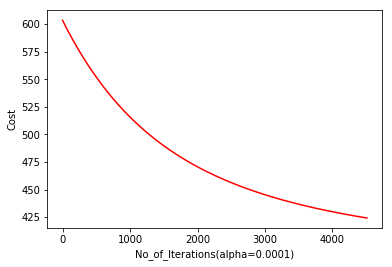

In [236]:
plt.plot(train_cost3,'r')
plt.xlabel('No_of_Iterations(alpha=0.0001)')
plt.ylabel('Cost')

Text(0, 0.5, 'Cost')

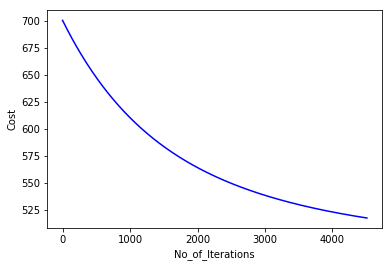

In [209]:
plt.plot(test_cost3,'b')
plt.xlabel('No_of_Iterations')
plt.ylabel('Cost')

Text(0.5, 1.0, 'Graph of Cost as a function of Alpha')

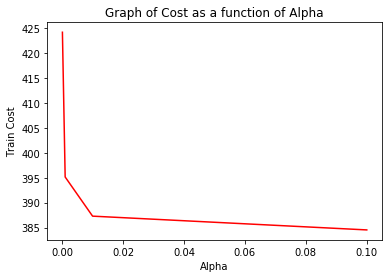

In [190]:
TESTCOST=[test_cost[-1],test_cost1[-1],test_cost2[-1],test_cost3[-1]]
TRAINCOST=[train_cost[-1],train_cost1[-1],train_cost2[-1],train_cost3[-1]]
ALPHAS=[0.1,0.01,0.001,0.0001]
plt.plot(ALPHAS,TRAINCOST,'r')
plt.xlabel("Alpha")
plt.ylabel("Train Cost")
plt.title("Graph of Cost as a function of Alpha")
#plt.plot(ALPHAS,TESTCOST,'b')
#plt.show()

Text(0.5, 1.0, 'Graph of Cost as a function of Alpha')

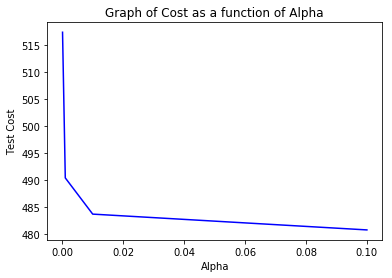

In [191]:
plt.plot(ALPHAS,TESTCOST,'b')
plt.xlabel("Alpha")
plt.ylabel("Test Cost")
plt.title("Graph of Cost as a function of Alpha")

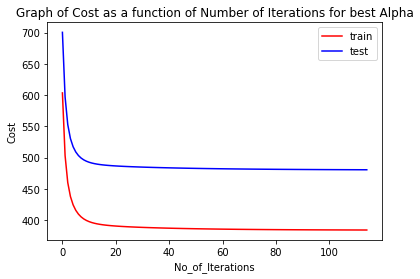

In [194]:
## The best alpha at which lowest error is at 0.1
## The plot for Train and test error for alpha at 0.1
plt.plot(train_cost,'r',label='train')
plt.plot(test_cost,'b',label='test')
plt.xlabel("No_of_Iterations")
plt.ylabel("Cost")
plt.legend(loc='upper right')
plt.title("Graph of Cost as a function of Number of Iterations for best Alpha")
plt.show()

In [272]:
#### Experiment 2:i) Varying the Threshold Values 
## Initializing beta
beta=np.zeros([1,len(x_train[0])])
## Running the algorithm for the first experiment for the training dataset
threshold = 1
train_cost4=[]
train_cos4=[]
test_cost4=[]
train_cos4.append(10000)
for i in range(1,10000):
    train_cost4.append(costfunction(x_train,y_train,beta))
    train_cos4.append(costfunction(x_train,y_train,beta))
    test_cost4.append(costfunction(x_test,y_test,beta))
    if (train_cos4[i-1]-train_cos4[i])<= threshold:
        print("Achieved Convergence")
        break 
    beta= gradientdescentFunction (x_train,y_train,beta,0.1)
    print("Train Cost:{} || Test Cost:{}".format(train_cost4[i-1],test_cost4[i-1]))

Train Cost:603.5170551512282 || Test Cost:700.287513988809
Train Cost:503.3321698442444 || Test Cost:597.063526985518
Train Cost:460.2621896590652 || Test Cost:552.9361237689104
Train Cost:438.0737788071306 || Test Cost:530.6100177478626
Train Cost:424.7875165589819 || Test Cost:517.5768998287971
Train Cost:416.01791091464395 || Test Cost:509.19798901091366
Train Cost:409.89699252608546 || Test Cost:503.4895546745152
Train Cost:405.4816794595503 || Test Cost:499.459636570336
Train Cost:402.22391693657204 || Test Cost:496.5429570500889
Train Cost:399.77502557440675 || Test Cost:494.3880017527552
Train Cost:397.9017077427117 || Test Cost:492.7646975059884
Train Cost:396.4435431329146 || Test Cost:491.51797869599363
Train Cost:395.28841823894015 || Test Cost:490.5414323771808
Achieved Convergence


Text(0, 0.5, 'Cost')

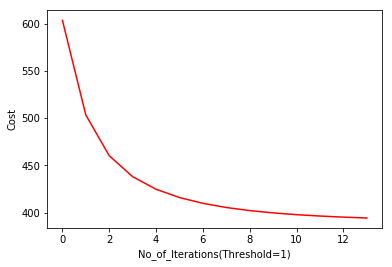

In [239]:
plt.plot(train_cost4,'r')
plt.xlabel('No_of_Iterations(Threshold=1)')
plt.ylabel('Cost')

Text(0, 0.5, 'Cost')

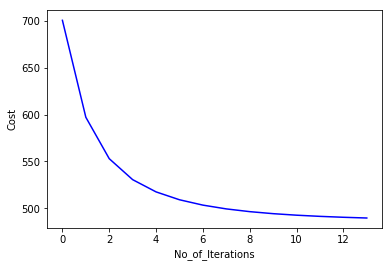

In [211]:
plt.plot(test_cost4,'b')
plt.xlabel('No_of_Iterations')
plt.ylabel('Cost')

In [273]:
## Initializing beta
beta=np.zeros([1,len(x_train[0])])
## Running the algorithm for the first experiment for the training dataset
threshold = 0.1
train_cost5=[]
train_cos5=[]
test_cost5=[]
train_cos5.append(10000)
for i in range(1,10000):
    train_cost5.append(costfunction(x_train,y_train,beta))
    train_cos5.append(costfunction(x_train,y_train,beta))
    test_cost5.append(costfunction(x_test,y_test,beta))
    if (train_cos5[i-1]-train_cos5[i])<= threshold:
        print("Achieved Convergence")
        break 
    beta= gradientdescentFunction (x_train,y_train,beta,0.1)
    print("Train Cost:{} || Test Cost:{}".format(train_cost5[i-1],test_cost5[i-1]))

Train Cost:603.5170551512282 || Test Cost:700.287513988809
Train Cost:503.3321698442444 || Test Cost:597.063526985518
Train Cost:460.2621896590652 || Test Cost:552.9361237689104
Train Cost:438.0737788071306 || Test Cost:530.6100177478626
Train Cost:424.7875165589819 || Test Cost:517.5768998287971
Train Cost:416.01791091464395 || Test Cost:509.19798901091366
Train Cost:409.89699252608546 || Test Cost:503.4895546745152
Train Cost:405.4816794595503 || Test Cost:499.459636570336
Train Cost:402.22391693657204 || Test Cost:496.5429570500889
Train Cost:399.77502557440675 || Test Cost:494.3880017527552
Train Cost:397.9017077427117 || Test Cost:492.7646975059884
Train Cost:396.4435431329146 || Test Cost:491.51797869599363
Train Cost:395.28841823894015 || Test Cost:490.5414323771808
Train Cost:394.3570739210608 || Test Cost:489.7610946966486
Train Cost:393.5929292502349 || Test Cost:489.12501143298823
Train Cost:392.955216293995 || Test Cost:488.59633130374857
Train Cost:392.4142856942037 || Tes

Text(0, 0.5, 'Cost')

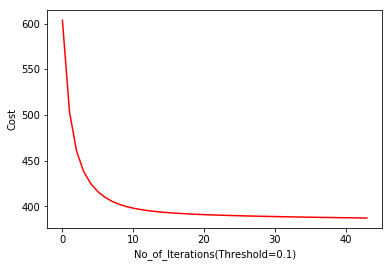

In [240]:
plt.plot(train_cost5,'r')
plt.xlabel('No_of_Iterations(Threshold=0.1)')
plt.ylabel('Cost')

Text(0, 0.5, 'Cost')

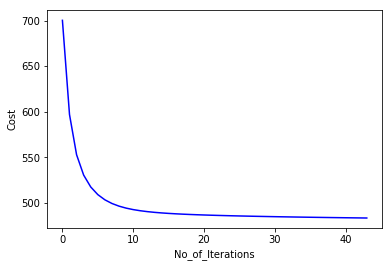

In [213]:
plt.plot(test_cost5,'b')
plt.xlabel('No_of_Iterations')
plt.ylabel('Cost')

In [274]:
## Initializing beta
beta=np.zeros([1,len(x_train[0])])
## Running the algorithm for the first experiment for the training dataset
threshold = 0.01
train_cost6=[]
train_cos6=[]
test_cost6=[]
train_cos6.append(10000)
for i in range(1,10000):
    train_cost6.append(costfunction(x_train,y_train,beta))
    train_cos6.append(costfunction(x_train,y_train,beta))
    test_cost6.append(costfunction(x_test,y_test,beta))
    if (train_cos6[i-1]-train_cos6[i])<= threshold:
        print("Achieved Convergence")
        break 
    beta= gradientdescentFunction (x_train,y_train,beta,0.1)
    print("Train Cost:{} || Test Cost:{}".format(train_cost6[i-1],test_cost6[i-1]))

Train Cost:603.5170551512282 || Test Cost:700.287513988809
Train Cost:503.3321698442444 || Test Cost:597.063526985518
Train Cost:460.2621896590652 || Test Cost:552.9361237689104
Train Cost:438.0737788071306 || Test Cost:530.6100177478626
Train Cost:424.7875165589819 || Test Cost:517.5768998287971
Train Cost:416.01791091464395 || Test Cost:509.19798901091366
Train Cost:409.89699252608546 || Test Cost:503.4895546745152
Train Cost:405.4816794595503 || Test Cost:499.459636570336
Train Cost:402.22391693657204 || Test Cost:496.5429570500889
Train Cost:399.77502557440675 || Test Cost:494.3880017527552
Train Cost:397.9017077427117 || Test Cost:492.7646975059884
Train Cost:396.4435431329146 || Test Cost:491.51797869599363
Train Cost:395.28841823894015 || Test Cost:490.5414323771808
Train Cost:394.3570739210608 || Test Cost:489.7610946966486
Train Cost:393.5929292502349 || Test Cost:489.12501143298823
Train Cost:392.955216293995 || Test Cost:488.59633130374857
Train Cost:392.4142856942037 || Tes

Text(0, 0.5, 'Cost')

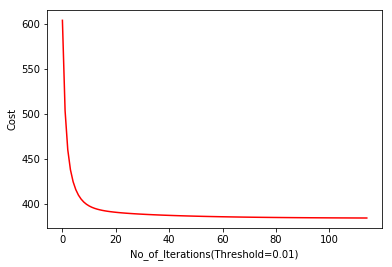

In [241]:
plt.plot(train_cost6,'r')
plt.xlabel('No_of_Iterations(Threshold=0.01)')
plt.ylabel('Cost')

Text(0, 0.5, 'Cost')

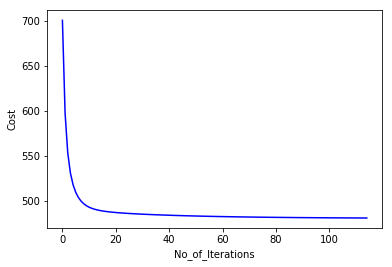

In [215]:
plt.plot(test_cost6,'b')
plt.xlabel('No_of_Iterations')
plt.ylabel('Cost')

In [248]:
## Initializing beta
beta=np.zeros([1,len(x_train[0])])
## Running the algorithm for the first experiment for the training dataset
threshold = 0.001
train_cost7=[]
train_cos7=[]
test_cost7=[]
train_cos7.append(10000)
for i in range(1,10000):
    train_cost7.append(costfunction(x_train,y_train,beta))
    train_cos7.append(costfunction(x_train,y_train,beta))
    test_cost7.append(costfunction(x_test,y_test,beta))
    if (train_cos7[i-1]-train_cos7[i])<= threshold:
        print("Achieved Convergence")
        break 
    beta= gradientdescentFunction (x_train,y_train,beta,0.1)
    print("Train Cost:{} || Test Cost:{}".format(train_cost7[i-1],test_cost7[i-1]))

Train Cost:603.5170551512282 || Test Cost:700.287513988809
Train Cost:503.3321698442444 || Test Cost:597.063526985518
Train Cost:460.2621896590652 || Test Cost:552.9361237689104
Train Cost:438.0737788071306 || Test Cost:530.6100177478626
Train Cost:424.7875165589819 || Test Cost:517.5768998287971
Train Cost:416.01791091464395 || Test Cost:509.19798901091366
Train Cost:409.89699252608546 || Test Cost:503.4895546745152
Train Cost:405.4816794595503 || Test Cost:499.459636570336
Train Cost:402.22391693657204 || Test Cost:496.5429570500889
Train Cost:399.77502557440675 || Test Cost:494.3880017527552
Train Cost:397.9017077427117 || Test Cost:492.7646975059884
Train Cost:396.4435431329146 || Test Cost:491.51797869599363
Train Cost:395.28841823894015 || Test Cost:490.5414323771808
Train Cost:394.3570739210608 || Test Cost:489.7610946966486
Train Cost:393.5929292502349 || Test Cost:489.12501143298823
Train Cost:392.955216293995 || Test Cost:488.59633130374857
Train Cost:392.4142856942037 || Tes

Train Cost:384.37749863559395 || Test Cost:480.54163537664925
Train Cost:384.3724926453559 || Test Cost:480.53383373006955
Train Cost:384.3676321437037 || Test Cost:480.52621186676976
Train Cost:384.3629124644355 || Test Cost:480.51876503732336
Train Cost:384.358329091403 || Test Cost:480.51148862771714
Train Cost:384.3538776536727 || Test Cost:480.50437815531455
Train Cost:384.34955392084345 || Test Cost:480.4974292649405
Train Cost:384.3453537985165 || Test Cost:480.49063772508447
Train Cost:384.3412733239108 || Test Cost:480.4839994242206
Train Cost:384.33730866162165 || Test Cost:480.47751036723764
Train Cost:384.3334560995163 || Test Cost:480.4711666719781
Train Cost:384.3297120447609 || Test Cost:480.4649645658832
Train Cost:384.32607301997865 || Test Cost:480.4589003827382
Train Cost:384.3225356595298 || Test Cost:480.4529705595181
Train Cost:384.319096705913 || Test Cost:480.44717163332786
Train Cost:384.31575300628305 || Test Cost:480.4415002384366
Train Cost:384.3125015090807

Text(0, 0.5, 'Cost')

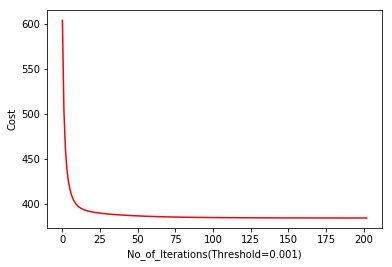

In [242]:
plt.plot(train_cost7,'r')
plt.xlabel('No_of_Iterations(Threshold=0.001)')
plt.ylabel('Cost')

Text(0, 0.5, 'Cost')

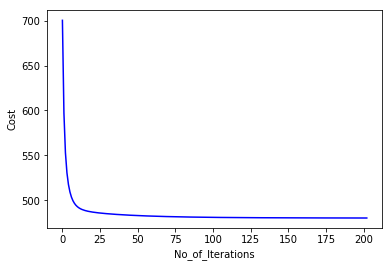

In [217]:
plt.plot(test_cost7,'b')
plt.xlabel('No_of_Iterations')
plt.ylabel('Cost')

In [54]:
## Initializing beta
beta=np.zeros([1,len(x_train[0])])
## Running the algorithm for the first experiment for the training dataset
threshold = 0.0001
train_cost8=[]
train_cos8=[]
test_cost8=[]
train_cos8.append(10000)
for i in range(1,10000):
    train_cost8.append(costfunction(x_train,y_train,beta))
    train_cos8.append(costfunction(x_train,y_train,beta))
    test_cost8.append(costfunction(x_test,y_test,beta))
    if (train_cos8[i-1]-train_cos8[i])<= threshold:
        print("Achieved Convergence")
        break 
    beta= gradientdescentFunction (x_train,y_train,beta,0.01)
    print("Train Cost:{} || Test Cost:{}".format(train_cost8[i-1],test_cost8[i-1]))

Train Cost:603.5170551512282 || Test Cost:700.287513988809
Train Cost:591.4536376520635 || Test Cost:687.8998173656719
Train Cost:580.2615551184116 || Test Cost:676.4054958566392
Train Cost:569.8698198387597 || Test Cost:665.732342442176
Train Cost:560.2135350111131 || Test Cost:655.814301846032
Train Cost:551.2333609505556 || Test Cost:646.5909341269848
Train Cost:542.8750284759727 || Test Cost:638.0069255209347
Train Cost:535.08889529181 || Test Cost:630.0116423522611
Train Cost:527.8295415523095 || Test Cost:622.5587242041076
Train Cost:521.0554011342413 || Test Cost:615.6057128751182
Train Cost:514.7284254526211 || Test Cost:609.113713958003
Train Cost:508.81377693498547 || Test Cost:603.0470881558543
Train Cost:503.27954952588607 || Test Cost:597.3731697077635
Train Cost:498.0965138266173 || Test Cost:592.0620095282441
Train Cost:493.23788468780117 || Test Cost:587.0861408772432
Train Cost:488.679109266177 || Test Cost:582.4203655709616
Train Cost:484.39767373345893 || Test Cost:5

Train Cost:394.10960961095793 || Test Cost:489.52207645007303
Train Cost:394.030616125203 || Test Cost:489.45602485736094
Train Cost:393.95307863692716 || Test Cost:489.3912410431519
Train Cost:393.8769588313687 || Test Cost:489.3276895531284
Train Cost:393.8022195428919 || Test Cost:489.2653360516773
Train Cost:393.7288247175138 || Test Cost:489.2041472837899
Train Cost:393.65673937675075 || Test Cost:489.14409103835743
Train Cost:393.58592958273806 || Test Cost:489.0851361128103
Train Cost:393.5163624045706 || Test Cost:489.027252279043
Train Cost:393.448005885818 || Test Cost:488.97041025057626
Train Cost:393.38082901316824 || Test Cost:488.91458165090523
Train Cost:393.31480168615946 || Test Cost:488.85973898298926
Train Cost:393.24989468795616 || Test Cost:488.80585559983615
Train Cost:393.18607965713056 || Test Cost:488.7529056761398
Train Cost:393.1233290604143 || Test Cost:488.70086418092905
Train Cost:393.06161616638 || Test Cost:488.6497068511915
Train Cost:393.000915020022 |

Train Cost:389.1631866776156 || Test Cost:485.38643368645
Train Cost:389.14515036353896 || Test Cost:485.3706732933627
Train Cost:389.12721495806204 || Test Cost:485.35499019119027
Train Cost:389.1093792493849 || Test Cost:485.3393834595964
Train Cost:389.09164204927515 || Test Cost:485.3238521970355
Train Cost:389.07400219252037 || Test Cost:485.30839552029386
Train Cost:389.05645853639624 || Test Cost:485.29301256404256
Train Cost:389.03900996014704 || Test Cost:485.2777024804033
Train Cost:389.02165536448 || Test Cost:485.26246443852534
Train Cost:389.00439367107253 || Test Cost:485.24729762417365
Train Cost:388.98722382209195 || Test Cost:485.23220123932896
Train Cost:388.9701447797269 || Test Cost:485.21717450179716
Train Cost:388.95315552573123 || Test Cost:485.2022166448302
Train Cost:388.9362550609797 || Test Cost:485.1873269167565
Train Cost:388.91944240503307 || Test Cost:485.17250458062176
Train Cost:388.90271659571687 || Test Cost:485.1577489138378
Train Cost:388.8860766887

Train Cost:387.32605581561154 || Test Cost:483.719021510499
Train Cost:387.31595682224815 || Test Cost:483.70947773470596
Train Cost:387.3058934227318 || Test Cost:483.6999630405047
Train Cost:387.29586544836 || Test Cost:483.69047730546396
Train Cost:387.2858727319837 || Test Cost:483.6810204082488
Train Cost:387.2759151079824 || Test Cost:483.67159222860244
Train Cost:387.26599241223937 || Test Cost:483.6621926473284
Train Cost:387.25610448211756 || Test Cost:483.65282154627306
Train Cost:387.2462511564368 || Test Cost:483.6434788083082
Train Cost:387.23643227545017 || Test Cost:483.63416431731446
Train Cost:387.2266476808217 || Test Cost:483.62487795816526
Train Cost:387.21689721560415 || Test Cost:483.61561961671003
Train Cost:387.20718072421687 || Test Cost:483.6063891797585
Train Cost:387.1974980524256 || Test Cost:483.5971865350656
Train Cost:387.18784904732064 || Test Cost:483.58801157131603
Train Cost:387.17823355729644 || Test Cost:483.5788641781096
Train Cost:387.16865143203

Train Cost:386.21872673557573 || Test Cost:482.6418559092498
Train Cost:386.21235694654087 || Test Cost:482.63545174438343
Train Cost:386.20600797499384 || Test Cost:482.6290656858541
Train Cost:386.1996797487551 || Test Cost:482.62269767808743
Train Cost:386.1933721959534 || Test Cost:482.61634766572195
Train Cost:386.18708524502523 || Test Cost:482.61001559360716
Train Cost:386.18081882471154 || Test Cost:482.6037014068018
Train Cost:386.1745728640553 || Test Cost:482.59740505057334
Train Cost:386.1683472924001 || Test Cost:482.5911264703946
Train Cost:386.1621420393874 || Test Cost:482.5848656119444
Train Cost:386.1559570349547 || Test Cost:482.57862242110485
Train Cost:386.1497922093328 || Test Cost:482.57239684395995
Train Cost:386.1436474930442 || Test Cost:482.56618882679487
Train Cost:386.1375228169009 || Test Cost:482.55999831609387
Train Cost:386.1314181120022 || Test Cost:482.5538252585395
Train Cost:386.125333309733 || Test Cost:482.5476696010109
Train Cost:386.119268341761

Train Cost:385.50932873597435 || Test Cost:481.9080408547812
Train Cost:385.50525718745416 || Test Cost:481.9036848222295
Train Cost:385.5011987325528 || Test Cost:481.8993407860477
Train Cost:385.4971533281698 || Test Cost:481.89500871111073
Train Cost:385.4931209313527 || Test Cost:481.8906885624013
Train Cost:385.4891014992959 || Test Cost:481.88638030500914
Train Cost:385.4850949893407 || Test Cost:481.8820839041309
Train Cost:385.4811013589743 || Test Cost:481.87779932507
Train Cost:385.47712056582935 || Test Cost:481.8735265332357
Train Cost:385.4731525676836 || Test Cost:481.8692654941431
Train Cost:385.4691973224587 || Test Cost:481.8650161734128
Train Cost:385.46525478822036 || Test Cost:481.8607785367702
Train Cost:385.4613249231772 || Test Cost:481.85655255004576
Train Cost:385.4574076856807 || Test Cost:481.85233817917384
Train Cost:385.453503034224 || Test Cost:481.84813539019297
Train Cost:385.4496109274421 || Test Cost:481.8439441492451
Train Cost:385.4457313241107 || Te

Train Cost:385.0494693287047 || Test Cost:481.4007083546443
Train Cost:385.04686982945736 || Test Cost:481.39773313512006
Train Cost:385.0442786065399 || Test Cost:481.39476589774796
Train Cost:385.0416956329888 || Test Cost:481.39180661949297
Train Cost:385.03912088193005 || Test Cost:481.3888552773892
Train Cost:385.0365543265775 || Test Cost:481.38591184853925
Train Cost:385.0339959402335 || Test Cost:481.38297631011375
Train Cost:385.03144569628853 || Test Cost:481.38004863935146
Train Cost:385.0289035682205 || Test Cost:481.37712881355907
Train Cost:385.02636952959483 || Test Cost:481.37421681011097
Train Cost:385.0238435540637 || Test Cost:481.37131260644867
Train Cost:385.0213256153664 || Test Cost:481.36841618008134
Train Cost:385.0188156873285 || Test Cost:481.3655275085847
Train Cost:385.0163137438617 || Test Cost:481.3626465696019
Train Cost:385.0138197589636 || Test Cost:481.35977334084197
Train Cost:385.0113337067178 || Test Cost:481.35690780008105
Train Cost:385.008855561

Train Cost:384.7585965898115 || Test Cost:481.0566300242603
Train Cost:384.7569184390133 || Test Cost:481.05456525069536
Train Cost:384.75524556847137 || Test Cost:481.0525058491801
Train Cost:384.75357796104424 || Test Cost:481.0504518044413
Train Cost:384.751915599647 || Test Cost:481.04840310125115
Train Cost:384.7502584672502 || Test Cost:481.04635972442685
Train Cost:384.74860654688007 || Test Cost:481.04432165883065
Train Cost:384.74695982161813 || Test Cost:481.04228888936956
Train Cost:384.74531827460123 || Test Cost:481.0402614009956
Train Cost:384.7436818890215 || Test Cost:481.03823917870506
Train Cost:384.74205064812526 || Test Cost:481.03622220753925
Train Cost:384.7404245352142 || Test Cost:481.03421047258337
Train Cost:384.73880353364405 || Test Cost:481.032203958967
Train Cost:384.7371876268253 || Test Cost:481.03020265186376
Train Cost:384.73557679822187 || Test Cost:481.02820653649127
Train Cost:384.73397103135244 || Test Cost:481.0262155981109
Train Cost:384.73237030

Train Cost:384.57471703172774 || Test Cost:480.8223712917937
Train Cost:384.57361345157403 || Test Cost:480.82090641347116
Train Cost:384.57251328829506 || Test Cost:480.81944521571495
Train Cost:384.57141653082084 || Test Cost:480.8179876882537
Train Cost:384.5703231681174 || Test Cost:480.8165338208471
Train Cost:384.56923318918626 || Test Cost:480.8150836032843
Train Cost:384.5681465830655 || Test Cost:480.81363702538476
Train Cost:384.56706333882795 || Test Cost:480.81219407699797
Train Cost:384.56598344558273 || Test Cost:480.8107547480035
Train Cost:384.5649068924739 || Test Cost:480.80931902831026
Train Cost:384.563833668681 || Test Cost:480.8078869078572
Train Cost:384.5627637634187 || Test Cost:480.80645837661297
Train Cost:384.56169716593666 || Test Cost:480.8050334245755
Train Cost:384.56063386551966 || Test Cost:480.8036120417722
Train Cost:384.55957385148747 || Test Cost:480.8021942182602
Train Cost:384.55851711319417 || Test Cost:480.8007799441251
Train Cost:384.557463640

Train Cost:384.4511819723406 || Test Cost:480.65205827913127
Train Cost:384.4504569489628 || Test Cost:480.6510134529385
Train Cost:384.44973411688386 || Test Cost:480.6499711473862
Train Cost:384.4490134690149 || Test Cost:480.6489313556035
Train Cost:384.44829499829007 || Test Cost:480.6478940707393
Train Cost:384.4475786976665 || Test Cost:480.64685928596265
Train Cost:384.44686456012425 || Test Cost:480.64582699446225
Train Cost:384.44615257866604 || Test Cost:480.6447971894469
Train Cost:384.4454427463174 || Test Cost:480.6437698641448
Train Cost:384.44473505612643 || Test Cost:480.6427450118045
Train Cost:384.44402950116375 || Test Cost:480.64172262569355
Train Cost:384.44332607452236 || Test Cost:480.6407026990991
Train Cost:384.4426247693181 || Test Cost:480.63968522532844
Train Cost:384.44192557868865 || Test Cost:480.6386701977079
Train Cost:384.4412284957944 || Test Cost:480.6376576095832
Train Cost:384.4405335138174 || Test Cost:480.63664745431936
Train Cost:384.43984062596

Train Cost:384.3695930845651 || Test Cost:480.5297788299202
Train Cost:384.36911090577615 || Test Cost:480.5290229270906
Train Cost:384.3686301331576 || Test Cost:480.528268767089
Train Cost:384.3681507621661 || Test Cost:480.5275163452938
Train Cost:384.3676727882735 || Test Cost:480.52676565709646
Train Cost:384.3671962069659 || Test Cost:480.5260166979017
Train Cost:384.36672101374415 || Test Cost:480.5252694631276
Train Cost:384.3662472041239 || Test Cost:480.52452394820483
Train Cost:384.3657747736349 || Test Cost:480.5237801485778
Train Cost:384.36530371782146 || Test Cost:480.5230380597037
Train Cost:384.36483403224275 || Test Cost:480.52229767705256
Train Cost:384.3643657124721 || Test Cost:480.5215589961075
Train Cost:384.3638987540968 || Test Cost:480.5208220123648
Train Cost:384.3634331527191 || Test Cost:480.52008672133326
Train Cost:384.3629689039549 || Test Cost:480.5193531185348
Train Cost:384.3625060034346 || Test Cost:480.51862119950397
Train Cost:384.3620444468027 || 

Train Cost:384.31557527362105 || Test Cost:480.4418049219535
Train Cost:384.3152471548057 || Test Cost:480.44124732305033
Train Cost:384.3149199446883 || Test Cost:480.44069094841467
Train Cost:384.3145936403367 || Test Cost:480.4401357948974
Train Cost:384.3142682388281 || Test Cost:480.43958185935907
Train Cost:384.3139437372487 || Test Cost:480.43902913866856
Train Cost:384.31362013269506 || Test Cost:480.43847762970387
Train Cost:384.31329742227234 || Test Cost:480.43792732935145
Train Cost:384.31297560309525 || Test Cost:480.4373782345068
Train Cost:384.3126546722882 || Test Cost:480.43683034207396
Train Cost:384.31233462698447 || Test Cost:480.4362836489657
Train Cost:384.3120154643267 || Test Cost:480.43573815210334
Train Cost:384.31169718146685 || Test Cost:480.435193848417
Train Cost:384.3113797755662 || Test Cost:480.43465073484526
Train Cost:384.31106324379505 || Test Cost:480.43410880833557
Train Cost:384.31074758333307 || Test Cost:480.43356806584353
Train Cost:384.3104327

Train Cost:384.2784381614052 || Test Cost:480.3764485084452
Train Cost:384.2782096240757 || Test Cost:480.376030932014
Train Cost:384.27798167428665 || Test Cost:480.3756142252451
Train Cost:384.2777543101445 || Test Cost:480.3751983859754
Train Cost:384.2775275297619 || Test Cost:480.3747834120479
Train Cost:384.2773013312575 || Test Cost:480.37436930131156
Train Cost:384.2770757127563 || Test Cost:480.37395605162146
Train Cost:384.27685067238895 || Test Cost:480.373543660838
Train Cost:384.2766262082925 || Test Cost:480.3731321268279
Train Cost:384.27640231861 || Test Cost:480.3727214474635
Train Cost:384.27617900149033 || Test Cost:480.3723116206231
Train Cost:384.2759562550882 || Test Cost:480.3719026441909
Train Cost:384.275734077565 || Test Cost:480.3714945160566
Train Cost:384.2755124670871 || Test Cost:480.37108723411586
Train Cost:384.2752914218275 || Test Cost:480.37068079627016
Train Cost:384.27507093996485 || Test Cost:480.3702752004267
Train Cost:384.27485101968375 || Test

Train Cost:384.25172398250993 || Test Cost:480.32619650363574
Train Cost:384.2515609866668 || Test Cost:480.32588080513784
Train Cost:384.2513983672938 || Test Cost:480.32556572716646
Train Cost:384.25123612317986 || Test Cost:480.32525126823384
Train Cost:384.2510742531174 || Test Cost:480.32493742685574
Train Cost:384.25091275590313 || Test Cost:480.3246242015521
Train Cost:384.2507516303374 || Test Cost:480.3243115908471
Train Cost:384.25059087522453 || Test Cost:480.32399959326847
Train Cost:384.25043048937283 || Test Cost:480.3236882073479
Train Cost:384.2502704715942 || Test Cost:480.3233774316213
Train Cost:384.25011082070444 || Test Cost:480.3230672646279
Train Cost:384.2499515355234 || Test Cost:480.32275770491157
Train Cost:384.24979261487454 || Test Cost:480.32244875101935
Train Cost:384.2496340575851 || Test Cost:480.3221404015028
Train Cost:384.24947586248635 || Test Cost:480.32183265491676
Train Cost:384.24931802841286 || Test Cost:480.32152550982016
Train Cost:384.249160

Train Cost:384.2324435132728 || Test Cost:480.28815460149184
Train Cost:384.2323222868797 || Test Cost:480.2879115690222
Train Cost:384.2322013026952 || Test Cost:480.2876689858649
Train Cost:384.2320805599415 || Test Cost:480.2874268509826
Train Cost:384.23196005784405 || Test Cost:480.2871851633404
Train Cost:384.23183979562975 || Test Cost:480.2869439219062
Train Cost:384.231719772529 || Test Cost:480.2867031256502
Train Cost:384.2315999877738 || Test Cost:480.28646277354585
Train Cost:384.2314804405995 || Test Cost:480.2862228645688
Train Cost:384.23136113024304 || Test Cost:480.28598339769746
Train Cost:384.2312420559446 || Test Cost:480.28574437191304
Train Cost:384.2311232169463 || Test Cost:480.2855057861991
Train Cost:384.23100461249294 || Test Cost:480.2852676395421
Train Cost:384.2308862418317 || Test Cost:480.2850299309308
Train Cost:384.2307681042122 || Test Cost:480.28479265935704
Train Cost:384.2306501988864 || Test Cost:480.28455582381486
Train Cost:384.2305325251089 ||

Text(0, 0.5, 'Cost')

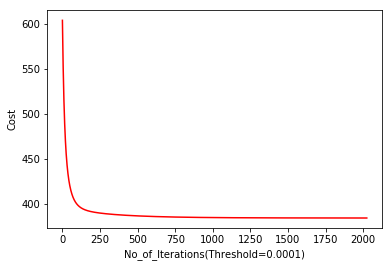

In [243]:
plt.plot(train_cost8,'r')
plt.xlabel('No_of_Iterations(Threshold=0.0001)')
plt.ylabel('Cost')

Text(0, 0.5, 'Cost')

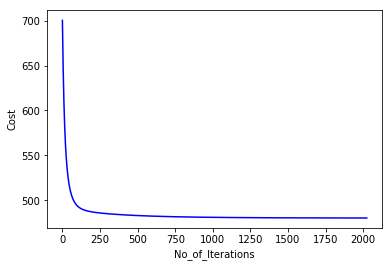

In [219]:
plt.plot(test_cost8,'b')
plt.xlabel('No_of_Iterations')
plt.ylabel('Cost')

Text(0.5, 1.0, 'Graph of Cost as a function of Threshold')

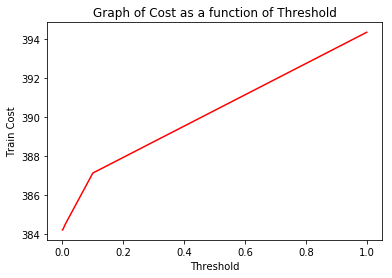

In [223]:
TEST_COST=[test_cost4[-1],test_cost5[-1],test_cost6[-1],test_cost7[-1],test_cost8[-1]]
TRAIN_COST=[train_cost4[-1],train_cost5[-1],train_cost6[-1],train_cost7[-1],train_cost8[-1]]
THRESHOLDS=[1,0.1,0.01,0.001,0.0001]

plt.plot(THRESHOLDS,TRAIN_COST,'r')
plt.xlabel("Threshold")
plt.ylabel("Train Cost")
plt.title("Graph of Cost as a function of Threshold")
#plt.plot(THRESHOLDS,TEST_COST,'b')


Text(0.5, 1.0, 'Graph of Cost as a function of Threshold')

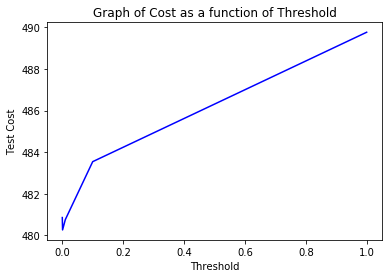

In [192]:
plt.plot(THRESHOLDS,TEST_COST,'b')
plt.xlabel("Threshold")
plt.ylabel("Test Cost")
plt.title("Graph of Cost as a function of Threshold")

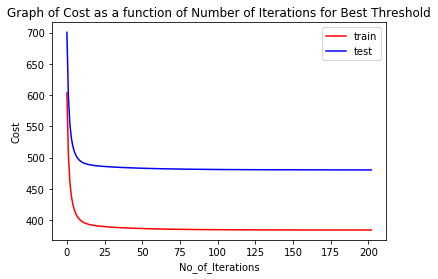

In [195]:
## The best Threshold value is 0.001
## The plot of Train and Test error rate for each iteration for threshold 0.001
plt.plot(train_cost7,'r',label='train')
plt.plot(test_cost7,'b',label='test')
plt.xlabel("No_of_Iterations")
plt.ylabel("Cost")
plt.legend(loc='upper right')
plt.title("Graph of Cost as a function of Number of Iterations for Best Threshold")
plt.show()


In [85]:
#### Experiment 3: selecting 5 random variables 
## Scaling the data
fea_scaling1 = preprocessing.StandardScaler().fit(train_data[['page_category','base_time','post_promotionstatus','c2_sd','h_local']])
traindata1 = fea_scaling1.transform(train_data[['page_category','base_time','post_promotionstatus','c2_sd','h_local']])
fea_scaling2 = preprocessing.StandardScaler().fit(test_data[['page_category','base_time','post_promotionstatus','c2_sd','h_local']])
testdata1 = fea_scaling2.transform(test_data[['page_category','base_time','post_promotionstatus','c2_sd','h_local']])


C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [86]:
## preperation of x for training set for matrix multiplication : 
x_ones =np.ones((len(traindata),1))
x_train1=np.append(x_ones,traindata1,axis=1)
## preperation of x for test set for matrix multiplication : 
x_ones =np.ones((len(testdata),1))
x_test1=np.append(x_ones,testdata1,axis=1)

In [87]:
## Getting y_train from the Training data set
y_train1=train_data.ix[:,'no_of_comments']
## Reshaping the y_train for Matrix calculations
y_train1=np.array(y_train1)
y_train1=np.reshape(y_train1,(len(train_data),1))
## Getting y_test from the Test data set
y_test1=test_data.ix[:,'no_of_comments']
## Reshaping the y_train for Matrix calculations
y_test1=np.array(y_test1)
y_test1=np.reshape(y_test1,(len(test_data),1))

C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [244]:
## Initializing beta
beta=np.zeros([1,len(x_train1[0])])
## Running the algorithm for the first experiment for the training dataset
threshold = 0.001
train_cost9=[]
train_cos9=[]
test_cost9=[]
train_cos9.append(10000)
for i in range(1,10000):
    train_cost9.append(costfunction(x_train1,y_train1,beta))
    train_cos9.append(costfunction(x_train1,y_train1,beta))
    test_cost9.append(costfunction(x_test1,y_test1,beta))
    if (train_cos9[i-1]-train_cos9[i])<= threshold:
        print("Achieved Convergence")
        break 
    beta= gradientdescentFunction (x_train1,y_train1,beta,0.1)
    print("Train Cost:{} || Test Cost:{}".format(train_cost9[i-1],test_cost9[i-1]))

Train Cost:603.5170551512282 || Test Cost:700.287513988809
Train Cost:580.4249021605299 || Test Cost:675.9281801211346
Train Cost:561.9938982718743 || Test Cost:656.4221775671339
Train Cost:547.2526538163211 || Test Cost:640.7647271515539
Train Cost:535.4377733141433 || Test Cost:628.1655539313039
Train Cost:525.9483029606091 || Test Cost:618.0019582421677
Train Cost:518.3103422239461 || Test Cost:609.782356647336
Train Cost:512.1495166492836 || Test Cost:603.1179200398389
Train Cost:507.16953731887025 || Test Cost:597.7004806977559
Train Cost:503.1354783070313 || Test Cost:593.2852983865507
Train Cost:499.8607155130075 || Test Cost:589.6775971596866
Train Cost:497.19671034472157 || Test Cost:586.7220318944497
Train Cost:495.02500660829236 || Test Cost:584.2944340804921
Train Cost:493.2509514511834 || Test Cost:582.2953331706692
Train Cost:491.79876113021925 || Test Cost:580.6448630301298
Train Cost:490.6076372545739 || Test Cost:579.2787504381879
Train Cost:489.6287047593778 || Test C

In [252]:
#### Experiment 4: selecting 5 important variables 
## Scaling the data
fea_scaling3 = preprocessing.StandardScaler().fit(train_data[['page_likes','page_talking','cc2','cc3','h_local']])
traindata2 = fea_scaling3.transform(train_data[['page_likes','page_talking','cc2','cc3','h_local']])
fea_scaling4 = preprocessing.StandardScaler().fit(test_data[['page_likes','page_talking','cc2','cc3','h_local']])
testdata2 = fea_scaling4.transform(test_data[['page_likes','page_talking','cc2','cc3','h_local']])

C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Aravind KK\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [124]:
## preperation of x for training set for matrix multiplication : 
x_ones =np.ones((len(traindata),1))
x_train2=np.append(x_ones,traindata2,axis=1)
## preperation of x for test set for matrix multiplication : 
x_ones =np.ones((len(testdata),1))
x_test2=np.append(x_ones,testdata2,axis=1)

In [125]:
## Getting y_train from the Training data set
y_train2=train_data.ix[:,'no_of_comments']
## Reshaping the y_train for Matrix calculations
y_train2=np.array(y_train2)
y_train2=np.reshape(y_train2,(len(train_data),1))
## Getting y_test from the Test data set
y_test2=test_data.ix[:,'no_of_comments']
## Reshaping the y_train for Matrix calculations
y_test2=np.array(y_test2)
y_test2=np.reshape(y_test2,(len(test_data),1))

C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Aravind KK\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [253]:
## Initializing beta
beta=np.zeros([1,len(x_train2[0])])
## Running the algorithm for the first experiment for the training dataset
threshold = 0.001
train_cost10=[]
train_cos10=[]
test_cost10=[]
train_cos10.append(10000)
for i in range(1,10000):
    train_cost10.append(costfunction(x_train2,y_train2,beta))
    train_cos10.append(costfunction(x_train2,y_train2,beta))
    test_cost10.append(costfunction(x_test2,y_test2,beta))
    if (train_cos10[i-1]-train_cos10[i])<= threshold:
        print("Achieved Convergence")
        break 
    beta= gradientdescentFunction (x_train2,y_train2,beta,0.1)
    print("Train Cost:{} || Test Cost:{}".format(train_cost10[i-1],test_cost10[i-1]))

Train Cost:603.5170551512282 || Test Cost:700.287513988809
Train Cost:560.5327537249898 || Test Cost:657.4496226738767
Train Cost:527.4528634122115 || Test Cost:624.495273031115
Train Cost:501.7626842690463 || Test Cost:598.921497927997
Train Cost:481.64216137099015 || Test Cost:578.9144887163255
Train Cost:465.7614157814451 || Test Cost:563.1472980631397
Train Cost:453.13910123246745 || Test Cost:550.6395764651865
Train Cost:443.04375414599457 || Test Cost:540.6597870203243
Train Cost:434.9246679493023 || Test Cost:532.6566117382404
Train Cost:428.36312453999034 || Test Cost:526.2105018435491
Train Cost:423.03772780344406 || Test Cost:520.9991950721637
Train Cost:418.6995583468148 || Test Cost:516.7729698404149
Train Cost:415.15420953491156 || Test Cost:513.3367290771929
Train Cost:412.2486776372008 || Test Cost:510.5369074323685
Train Cost:409.8617017397938 || Test Cost:508.2518107236662
Train Cost:407.89657537615136 || Test Cost:506.38441779450966
Train Cost:406.2757446235472 || Tes